In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as tF
import torchmetrics.functional as tmF

/opt/homebrew/anaconda3/envs/segmenting-subsurface-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
volume_path = os.path.join(os.pardir, 'data', 'raw', 'train', '69764103', 'horizon_labels_block-2_vol_69764103.npy')
volume = np.load(volume_path, allow_pickle=True)
volume = volume + 8
slice = volume[0, :, :].T
slice = torch.from_numpy(slice).to(dtype=torch.int64)

num_classes = 100

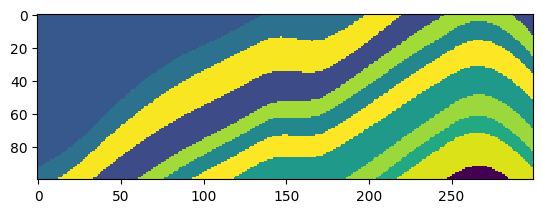

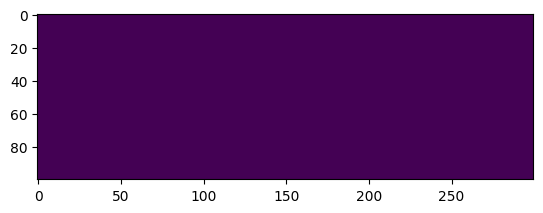

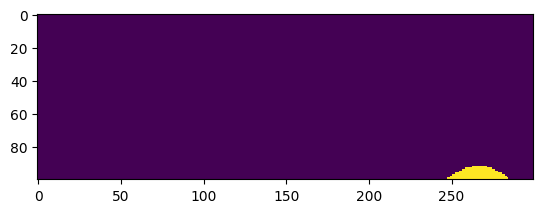

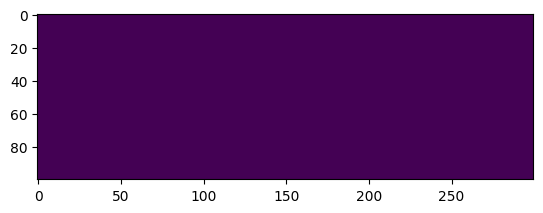

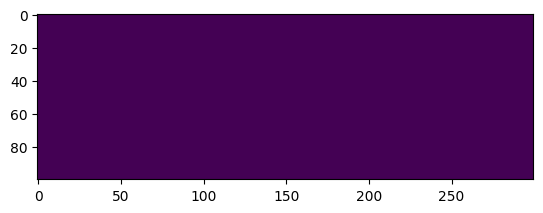

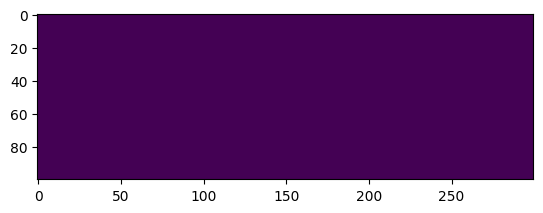

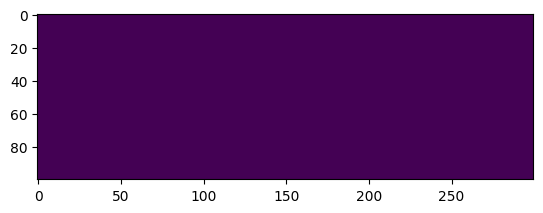

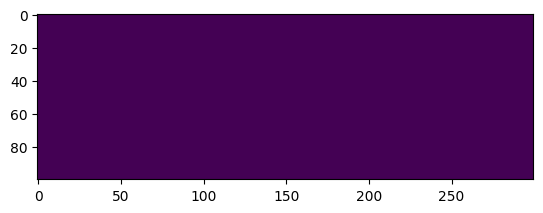

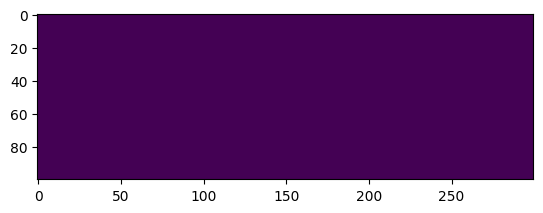

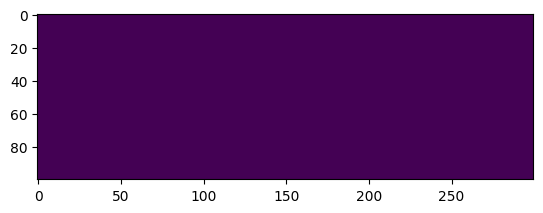

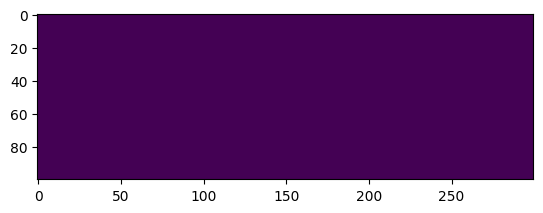

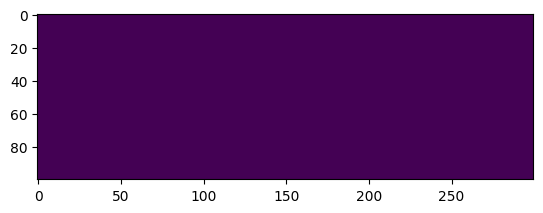

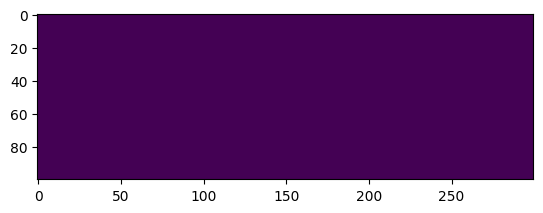

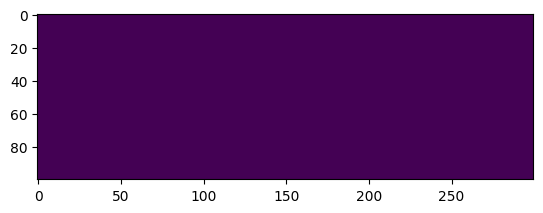

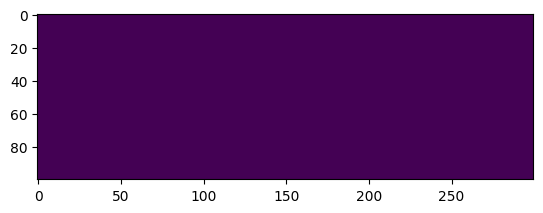

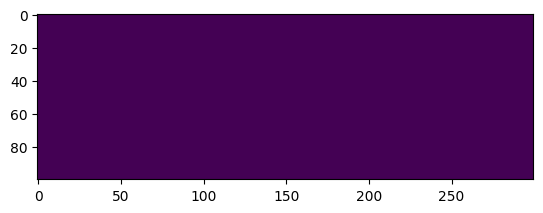

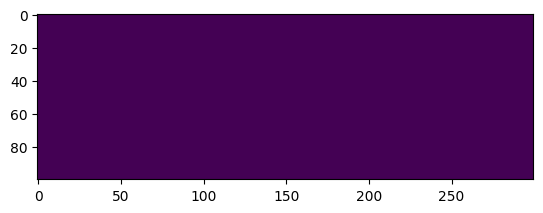

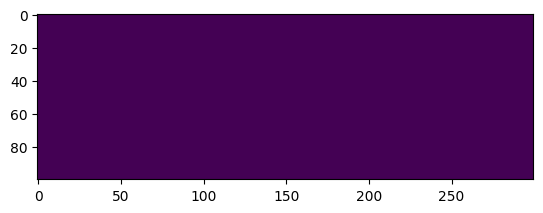

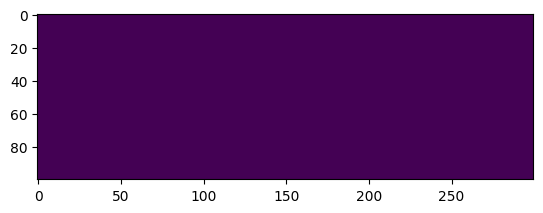

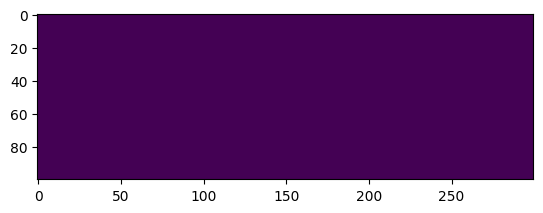

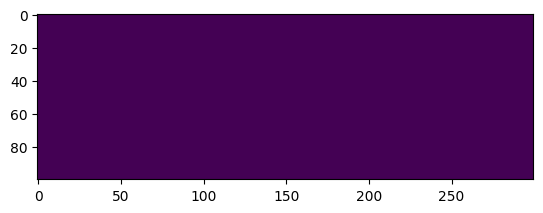

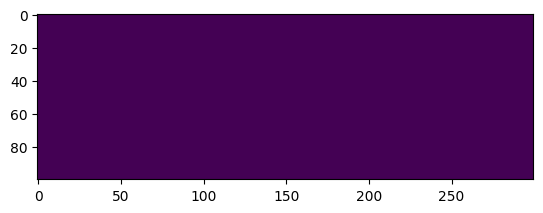

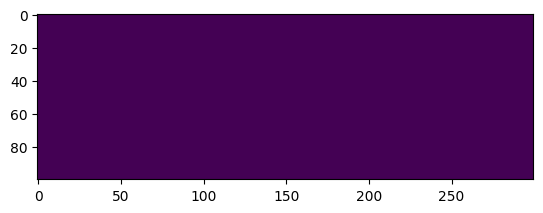

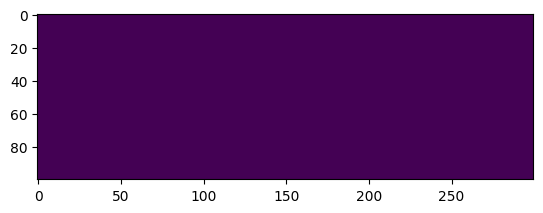

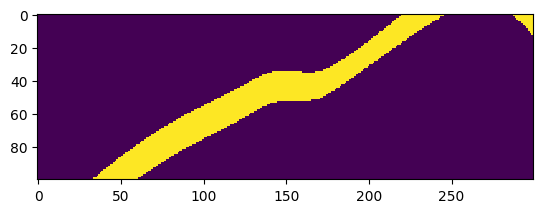

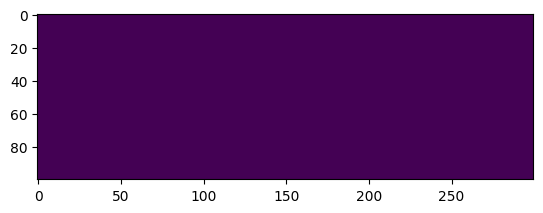

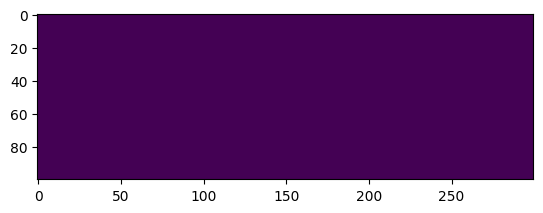

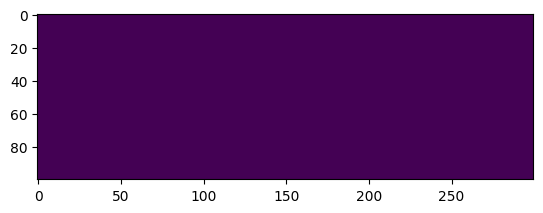

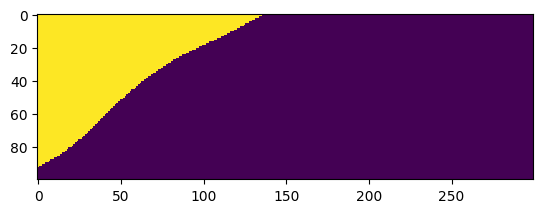

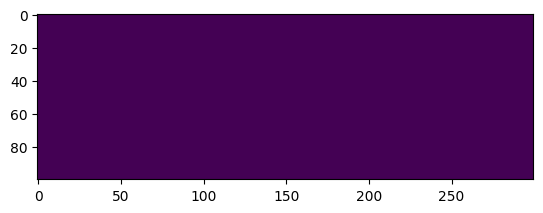

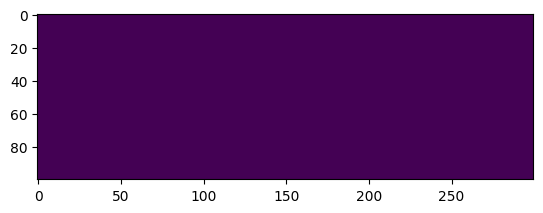

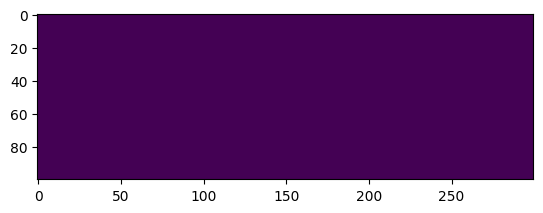

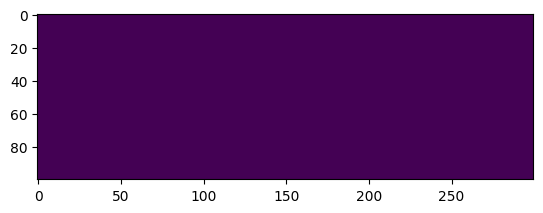

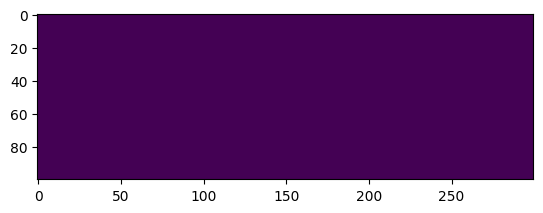

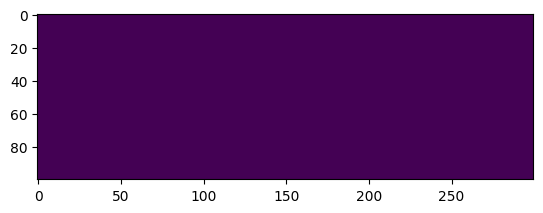

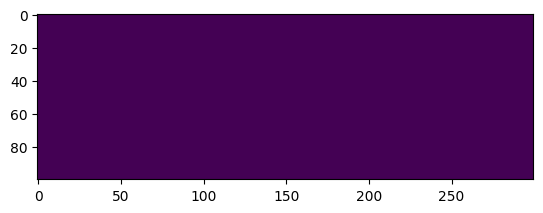

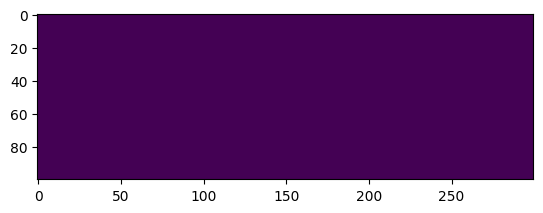

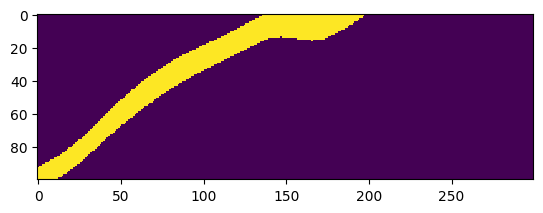

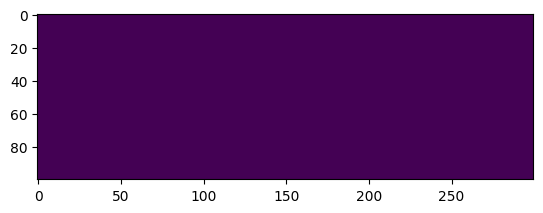

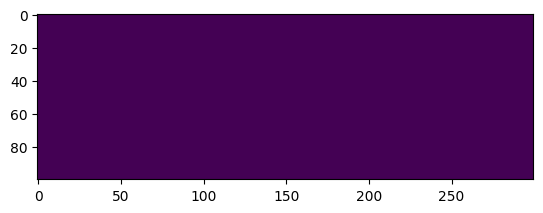

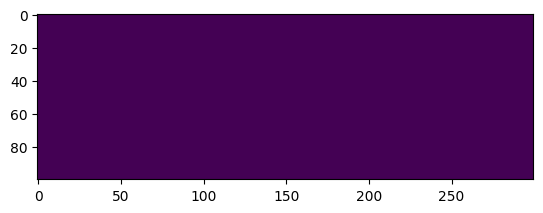

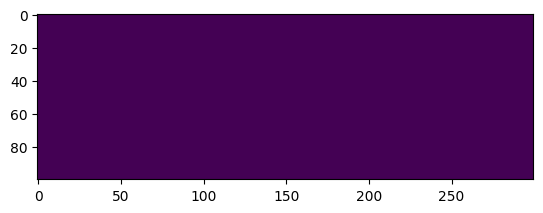

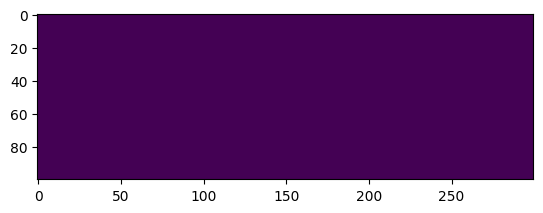

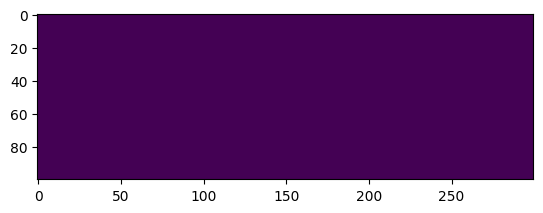

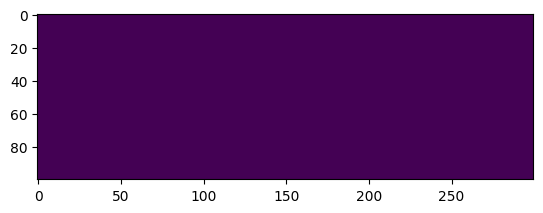

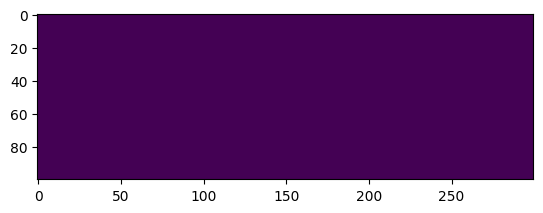

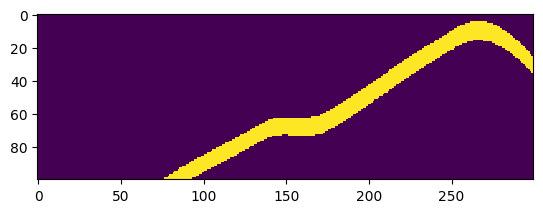

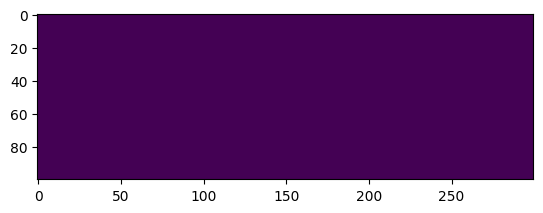

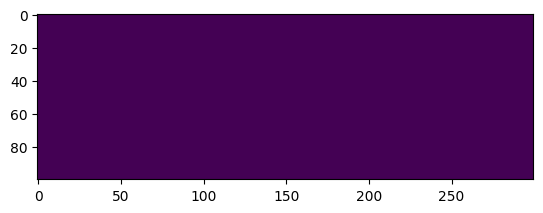

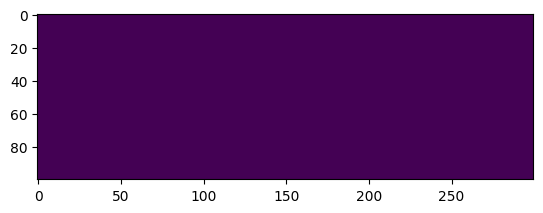

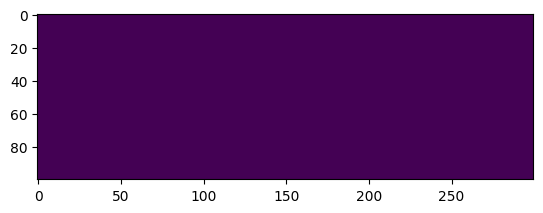

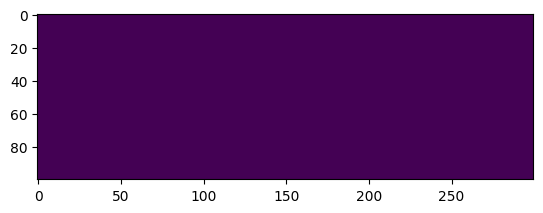

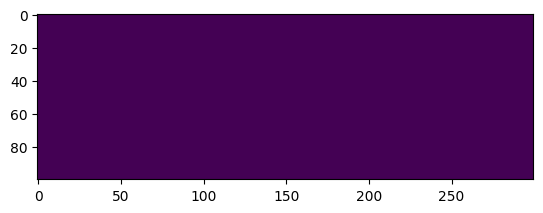

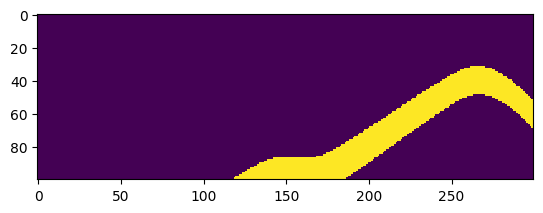

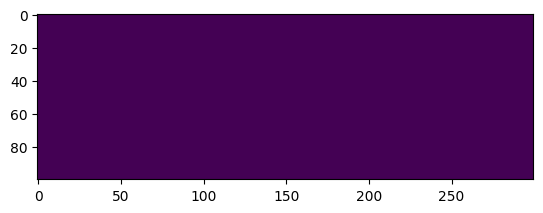

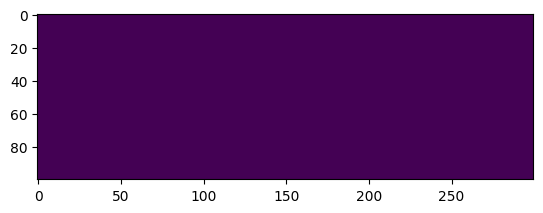

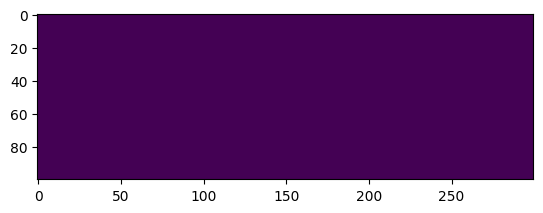

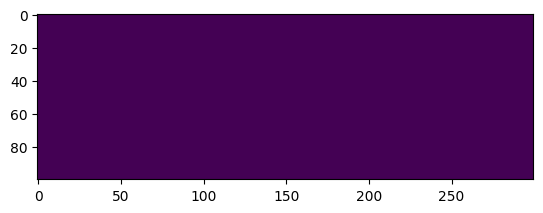

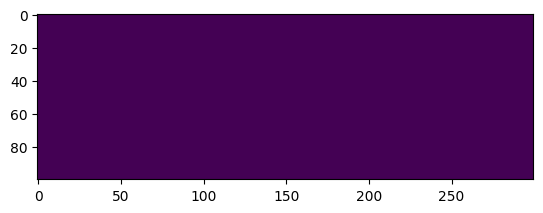

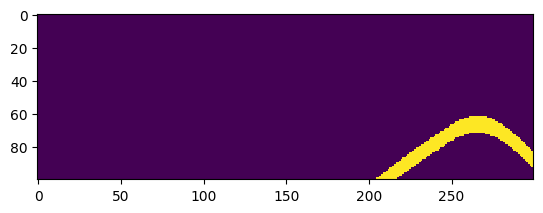

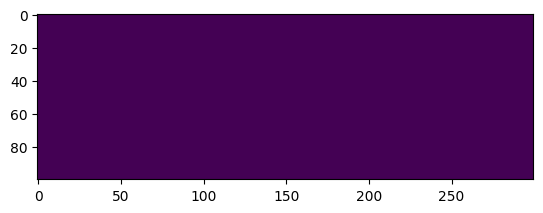

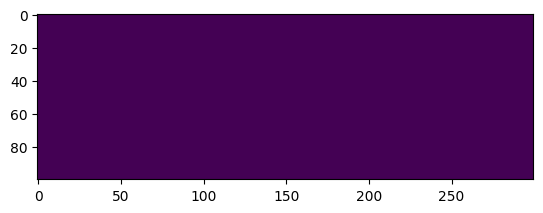

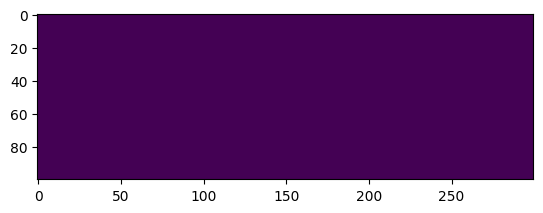

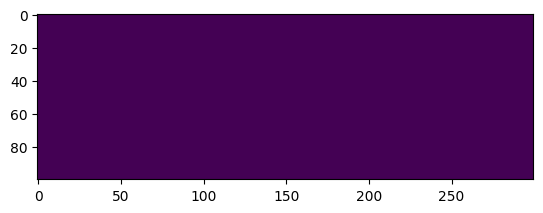

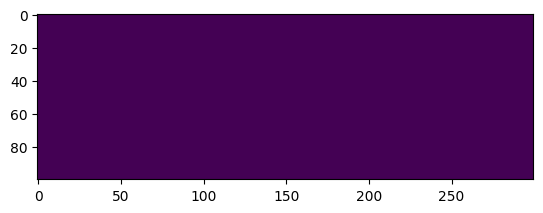

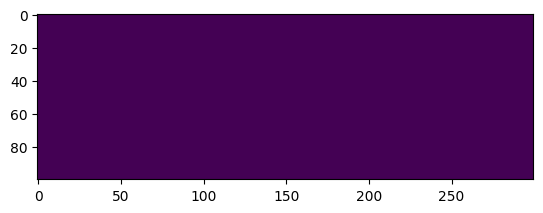

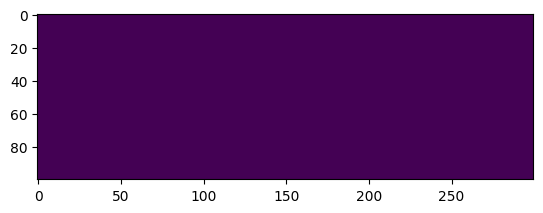

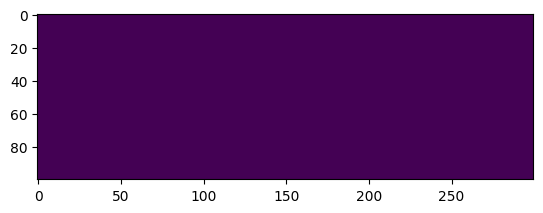

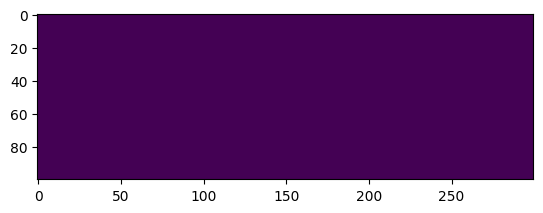

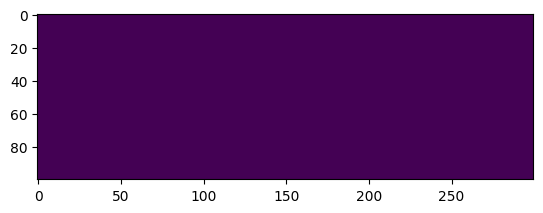

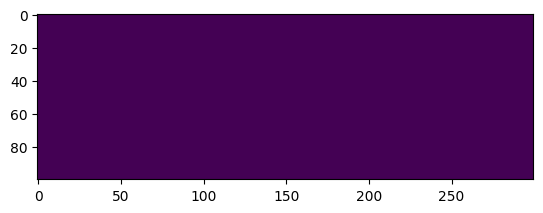

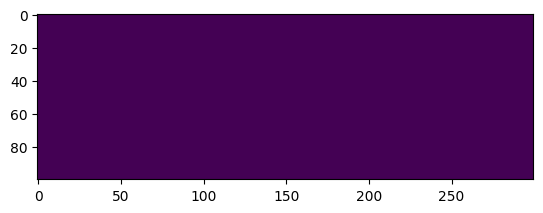

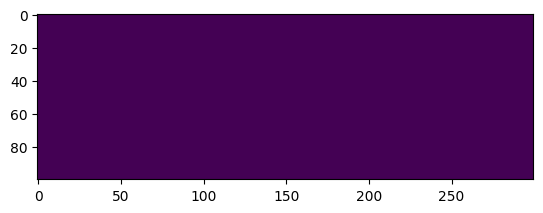

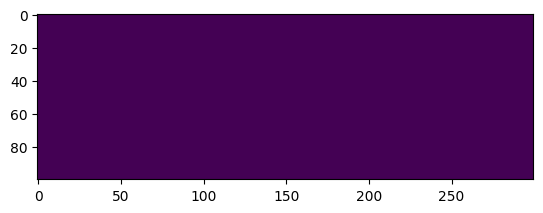

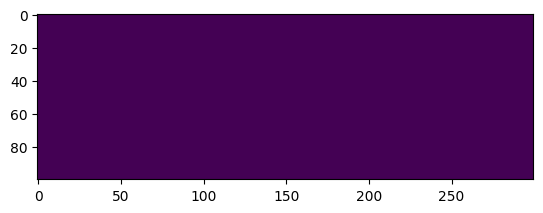

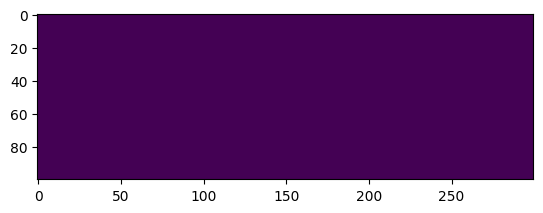

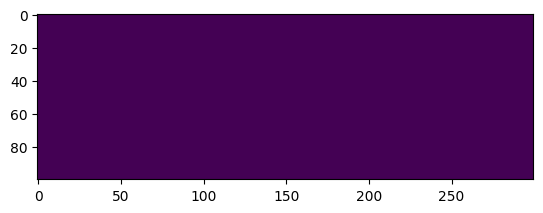

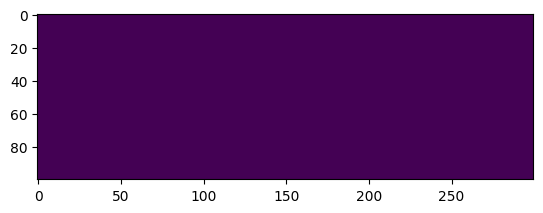

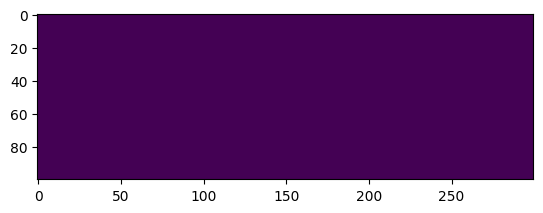

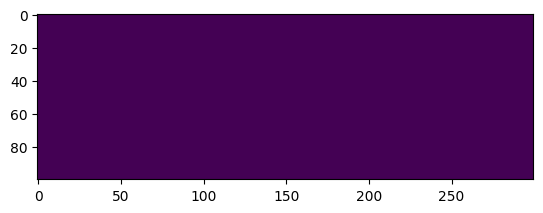

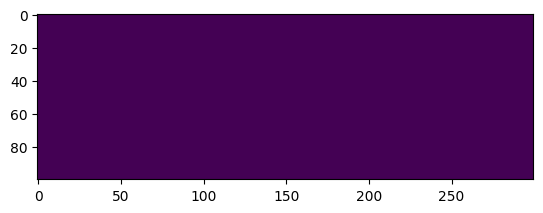

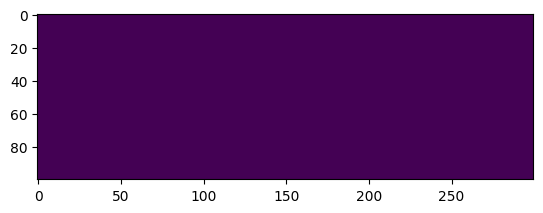

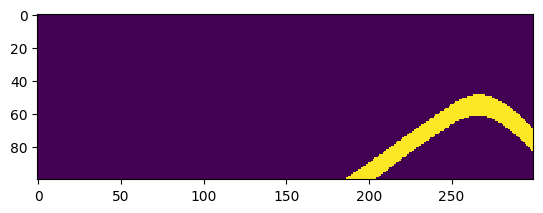

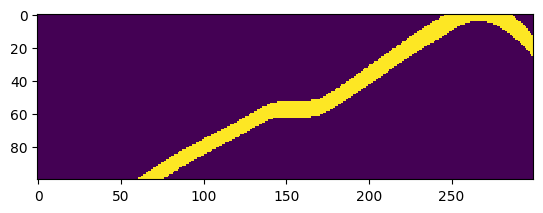

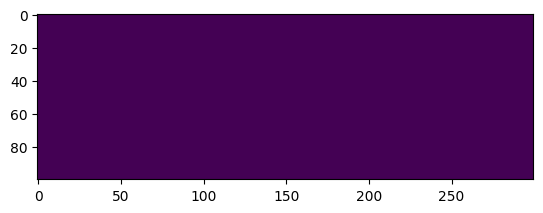

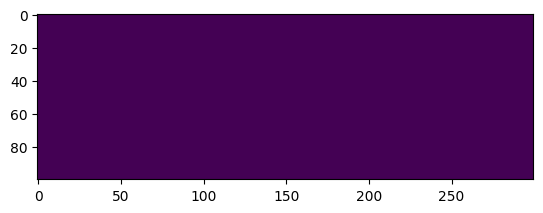

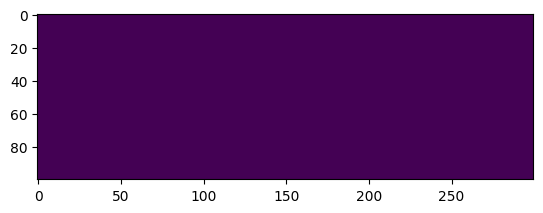

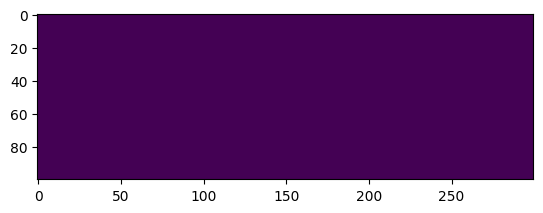

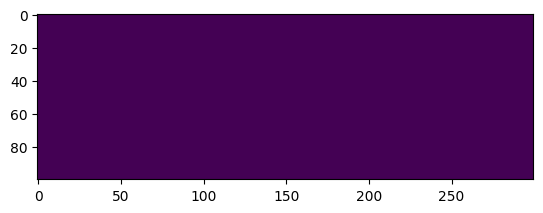

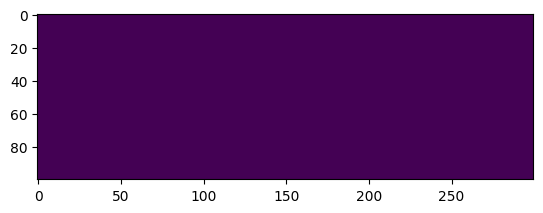

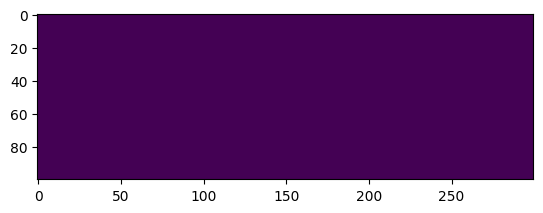

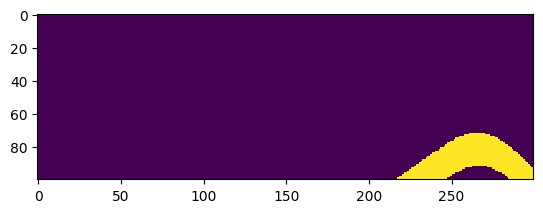

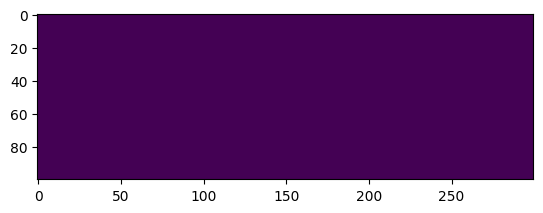

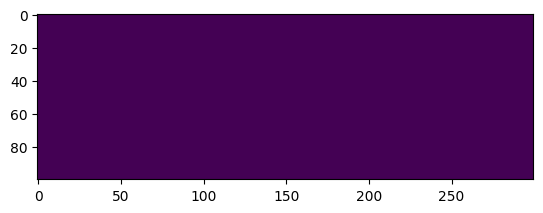

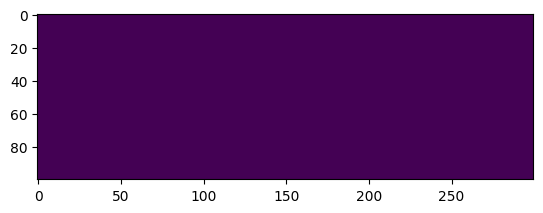

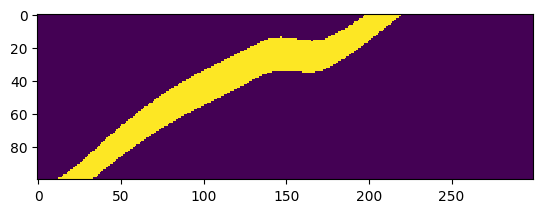

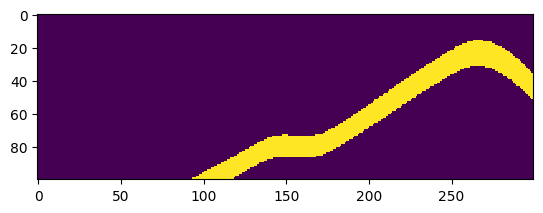

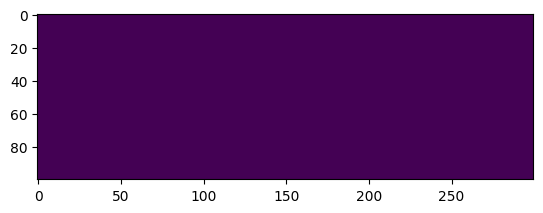

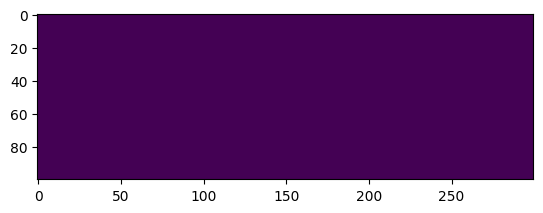

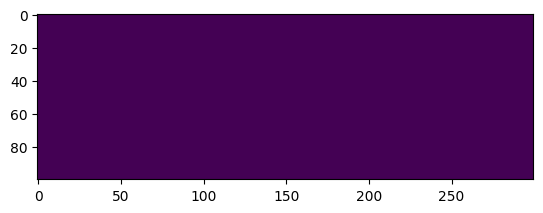

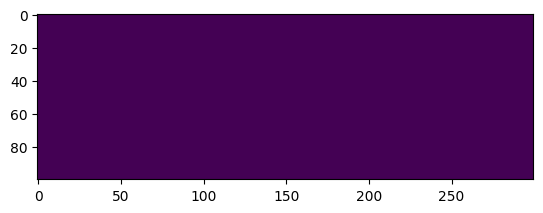

In [3]:
labels = torch.permute(tF.one_hot(slice, num_classes=num_classes), (2, 0, 1))

randperm = torch.randperm(labels.shape[0])
labels = labels[randperm, :, :]

plt.imshow(labels.argmax(dim=0), interpolation='nearest')
plt.show()

for c in range(labels.shape[0]):
    plt.imshow(labels[c], interpolation='nearest')
    plt.show()

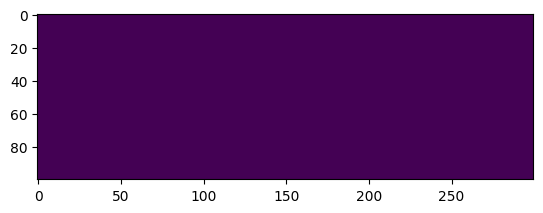

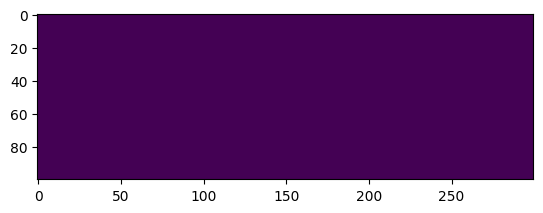

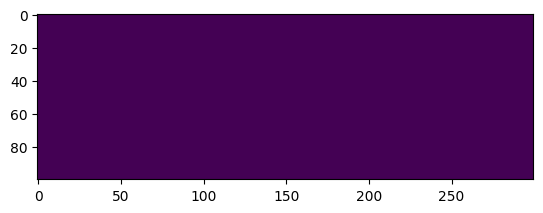

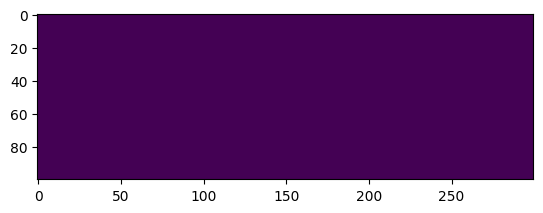

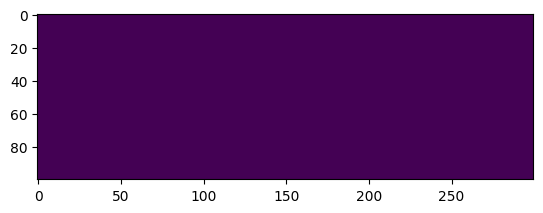

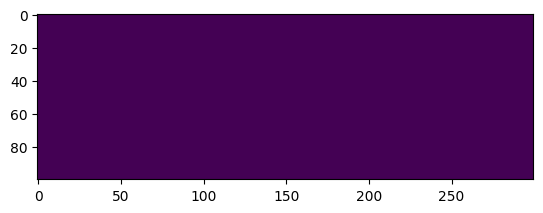

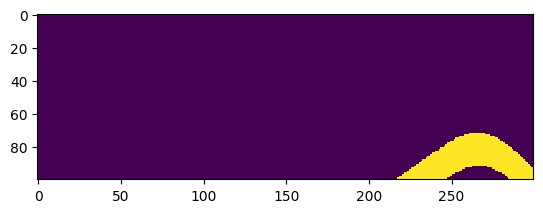

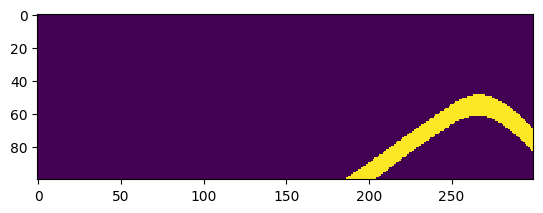

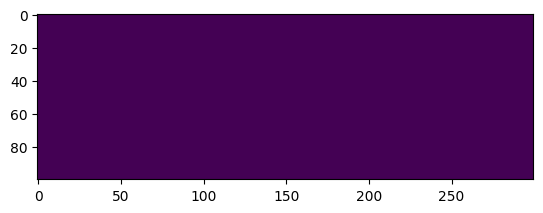

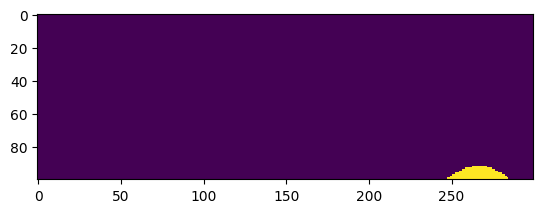

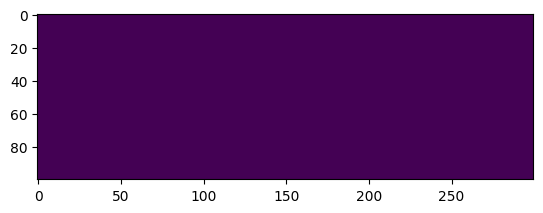

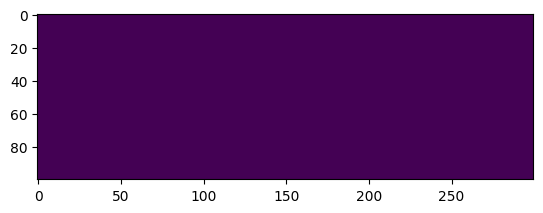

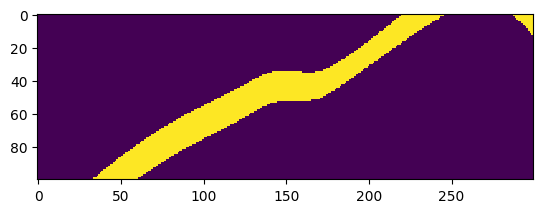

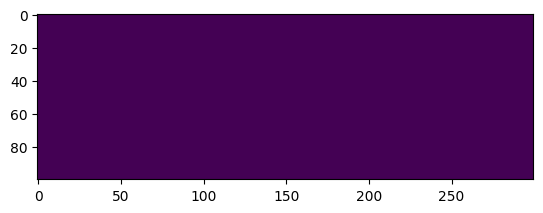

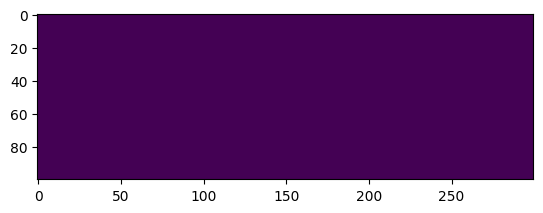

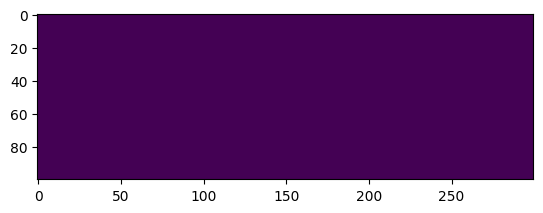

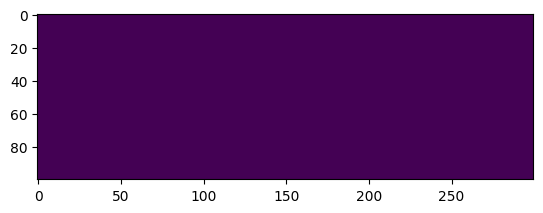

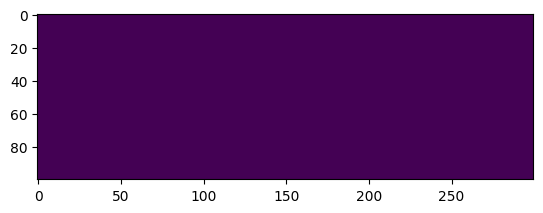

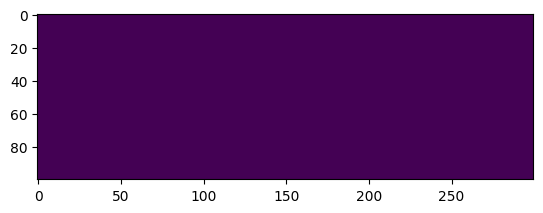

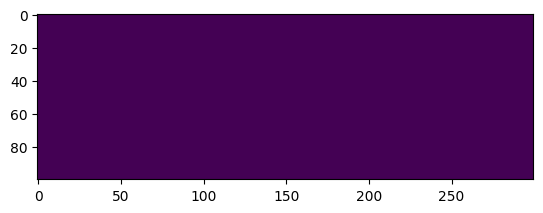

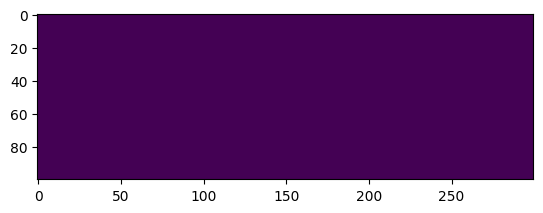

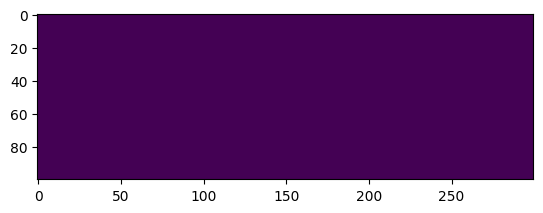

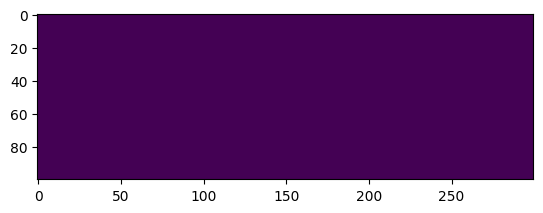

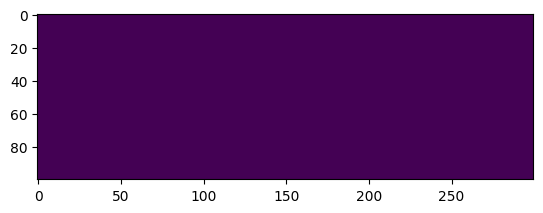

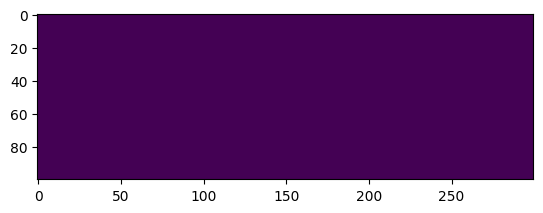

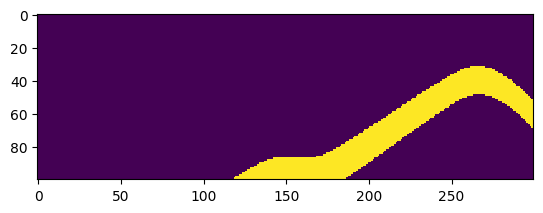

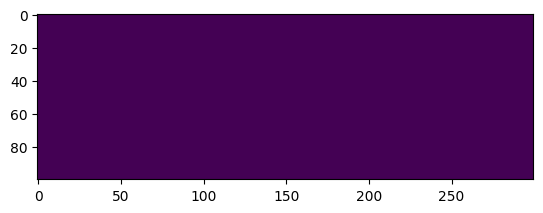

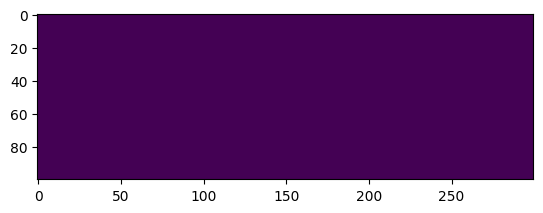

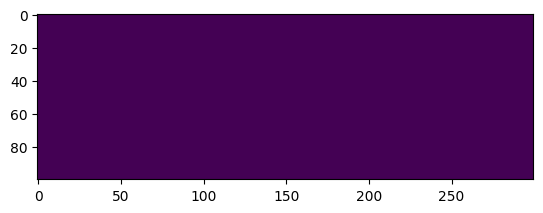

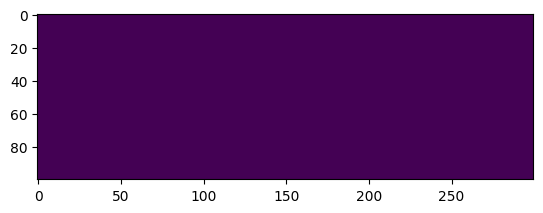

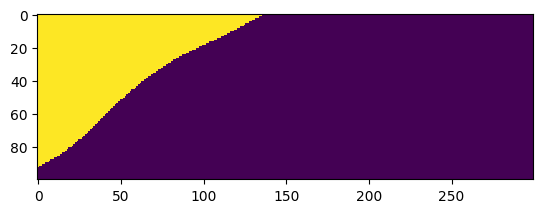

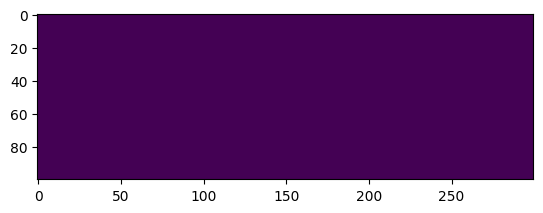

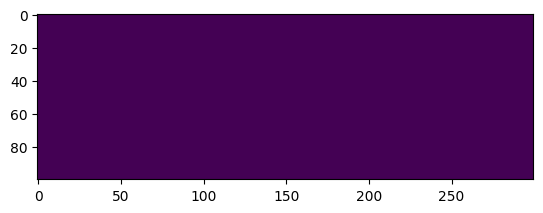

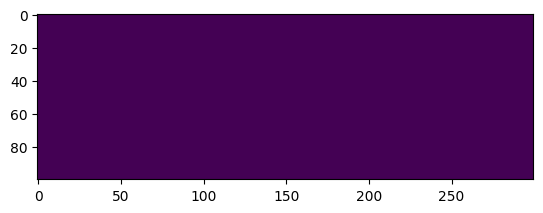

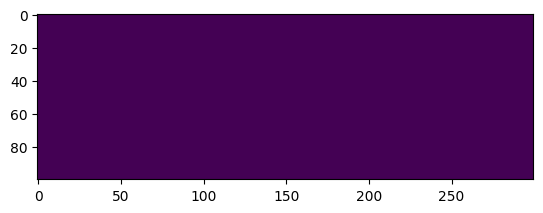

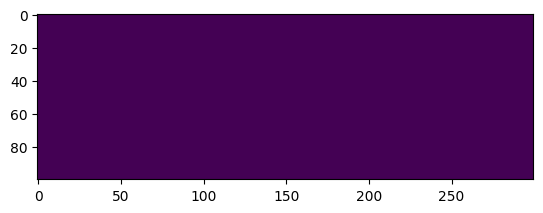

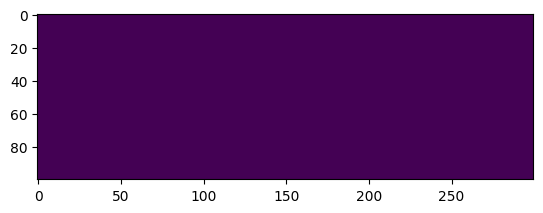

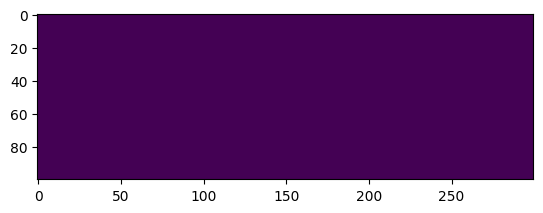

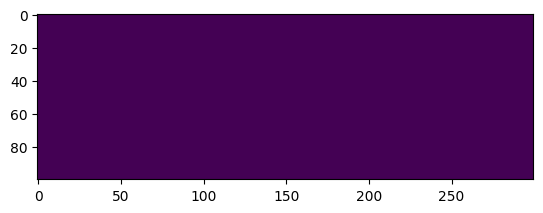

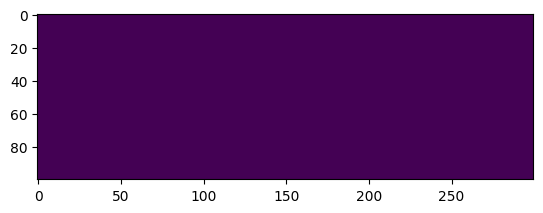

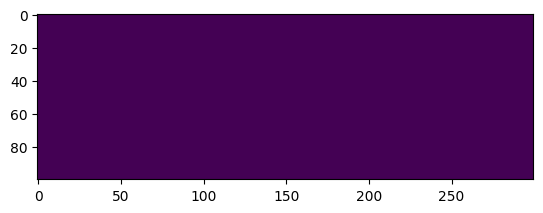

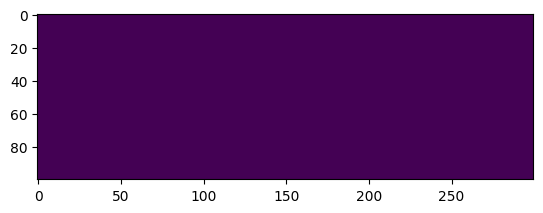

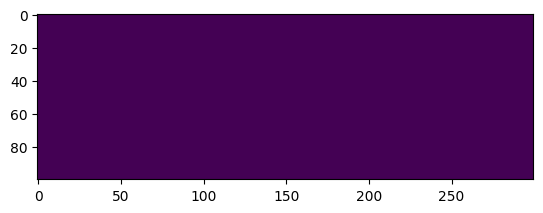

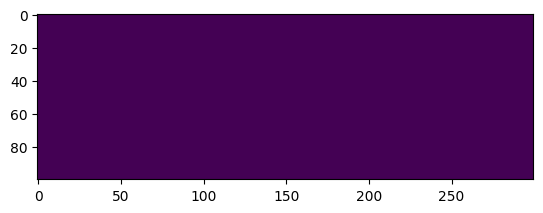

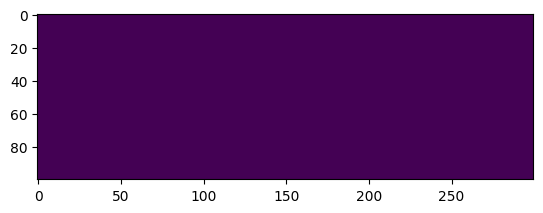

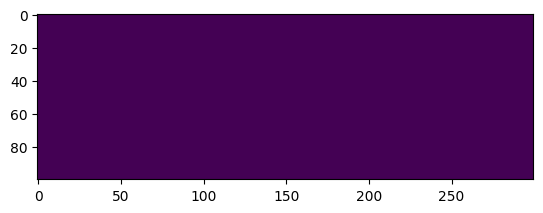

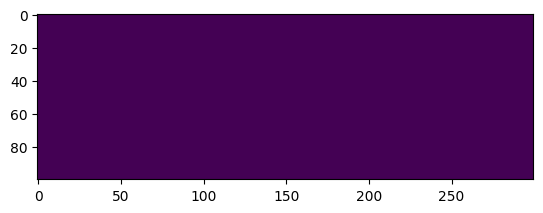

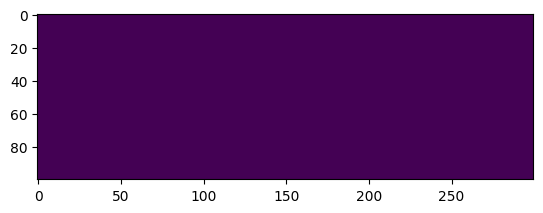

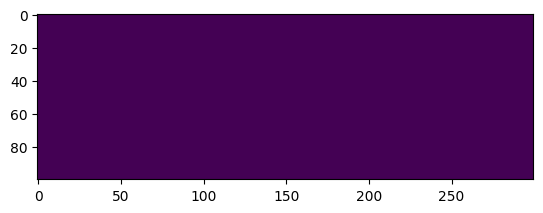

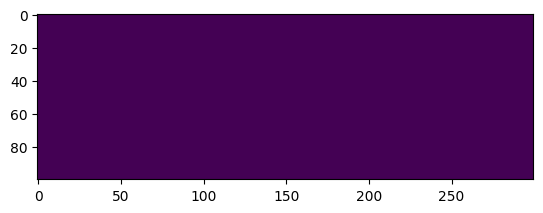

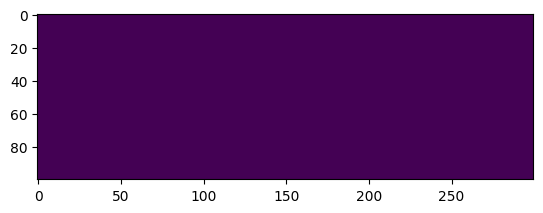

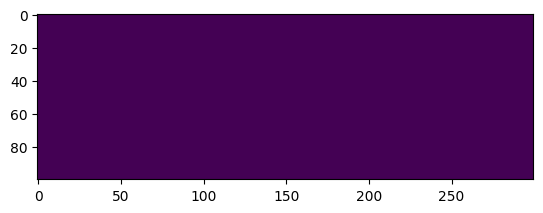

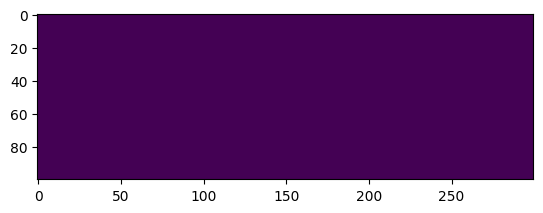

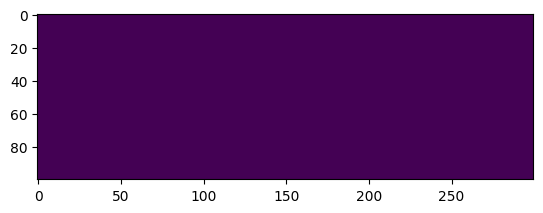

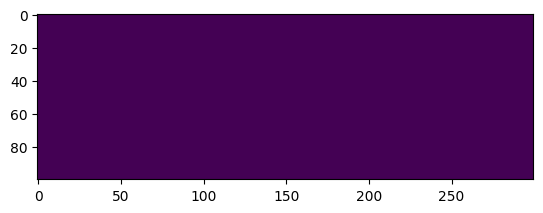

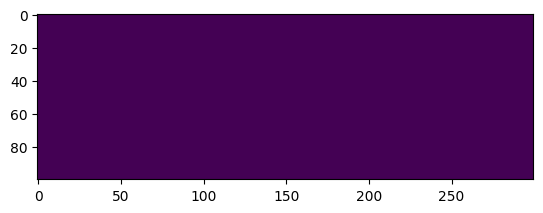

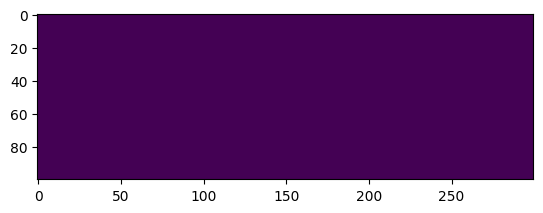

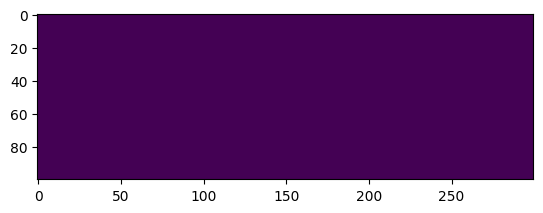

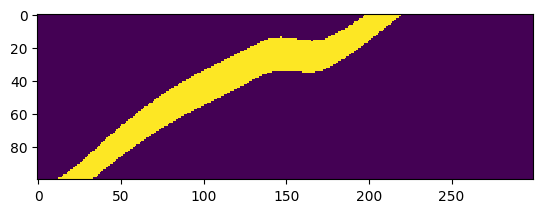

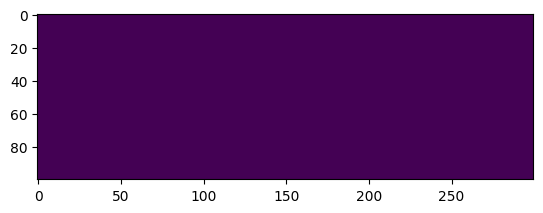

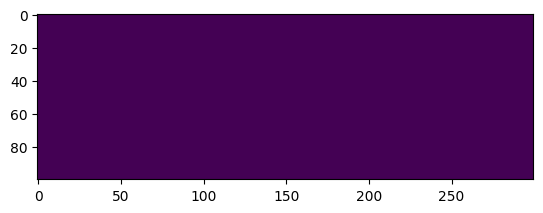

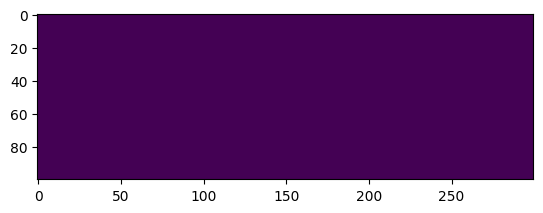

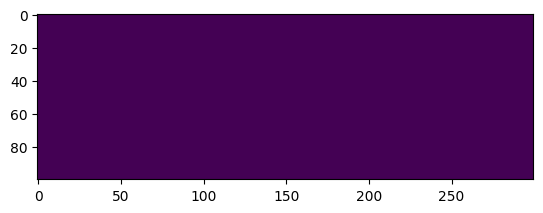

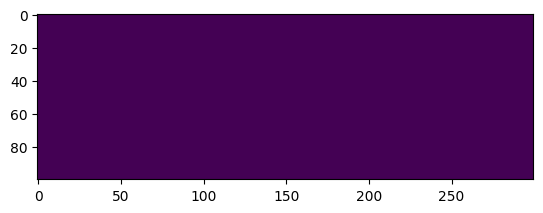

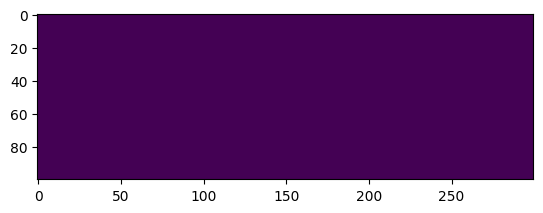

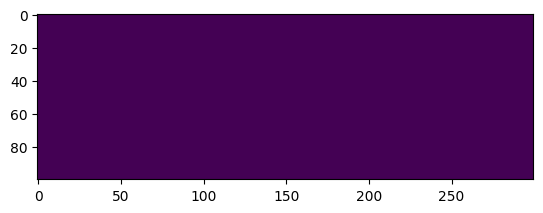

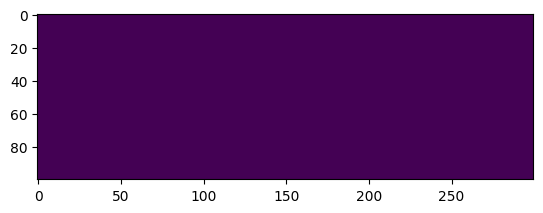

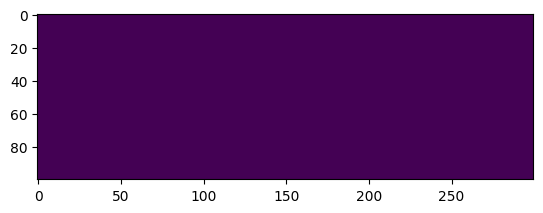

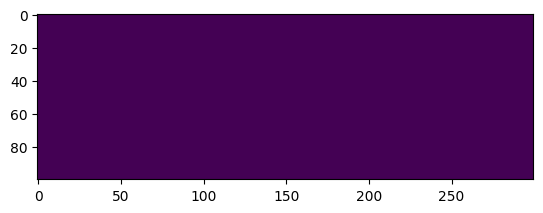

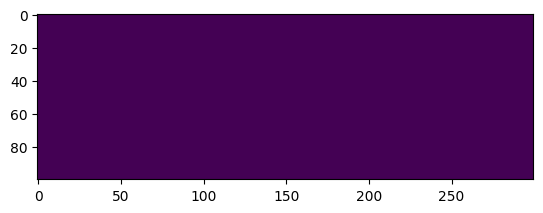

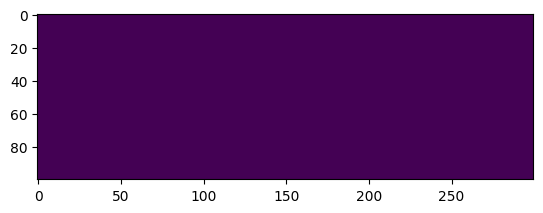

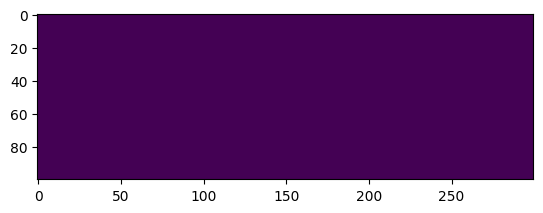

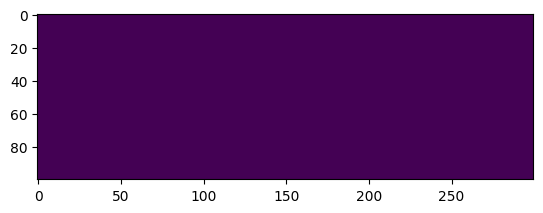

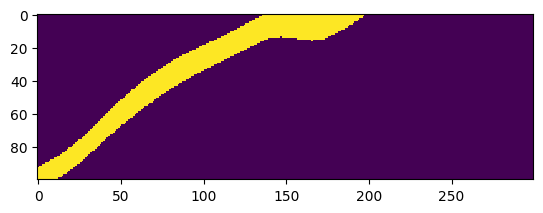

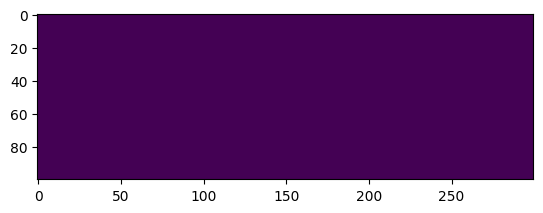

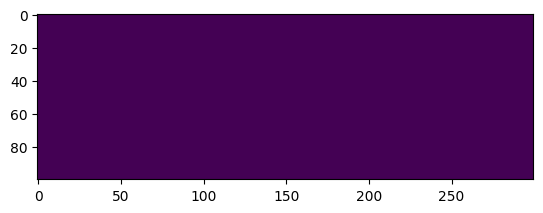

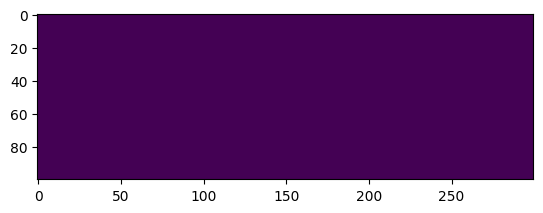

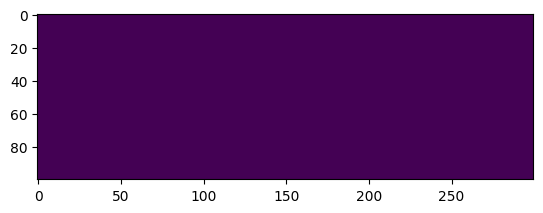

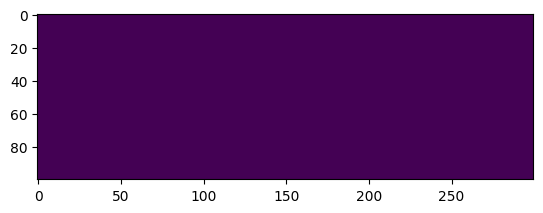

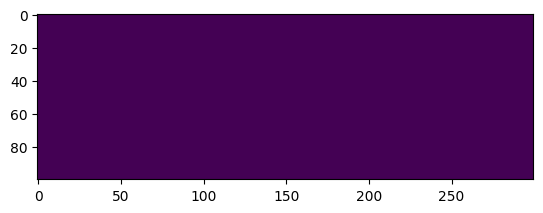

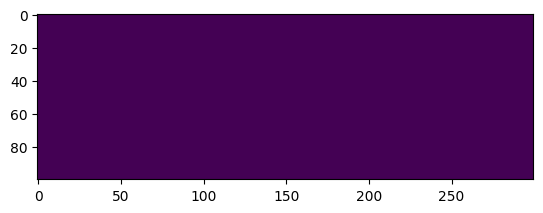

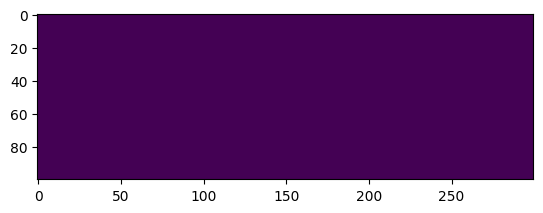

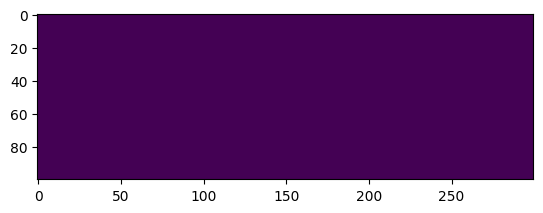

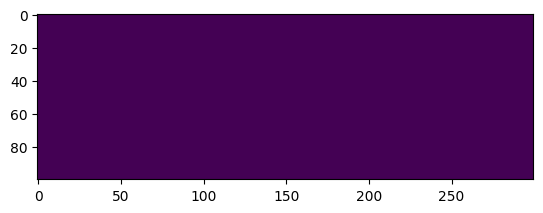

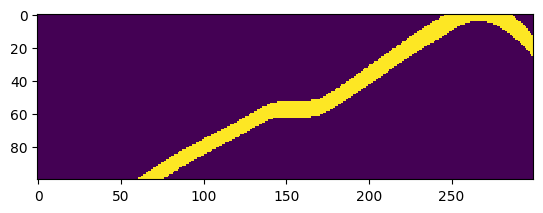

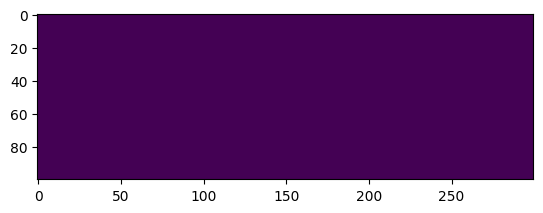

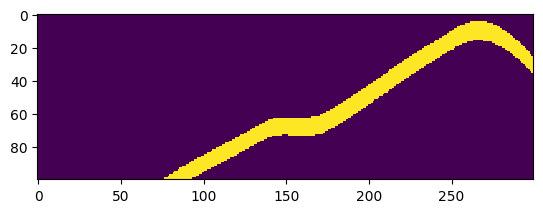

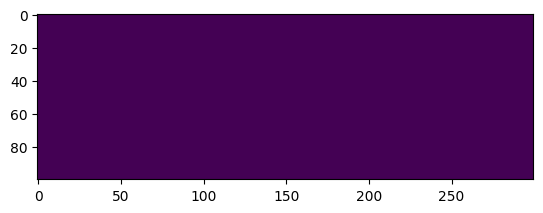

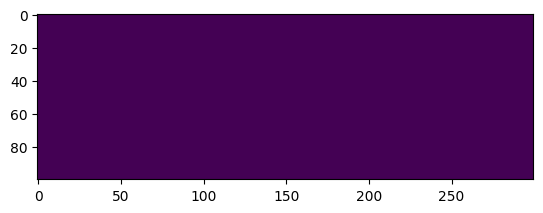

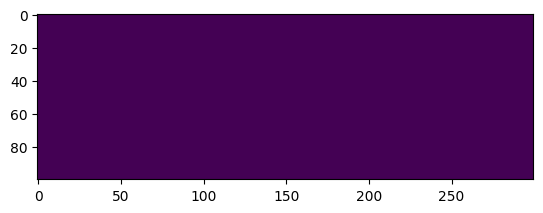

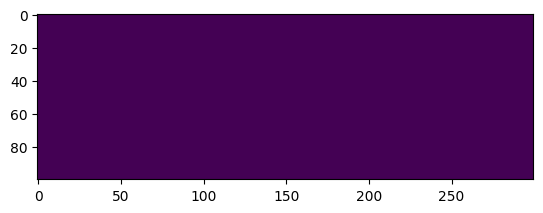

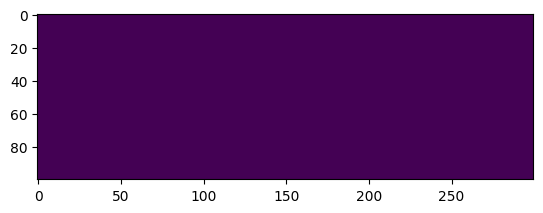

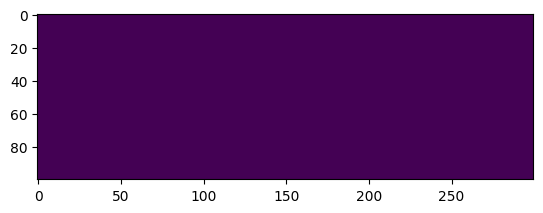

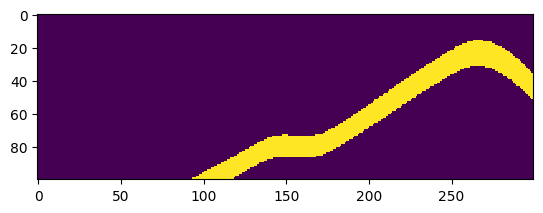

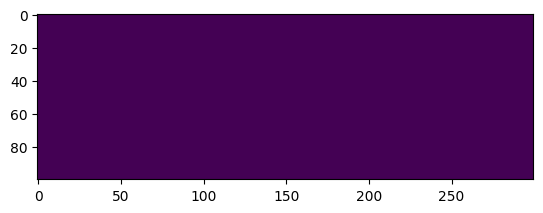

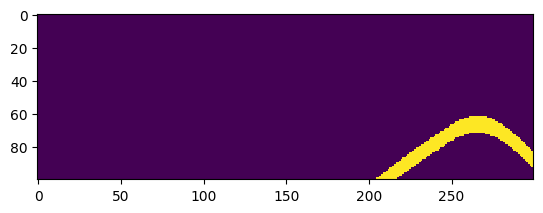

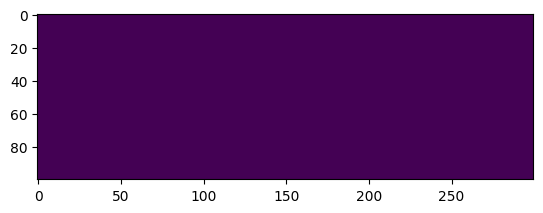

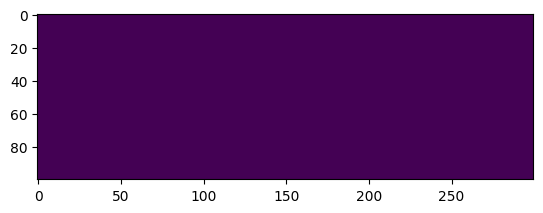

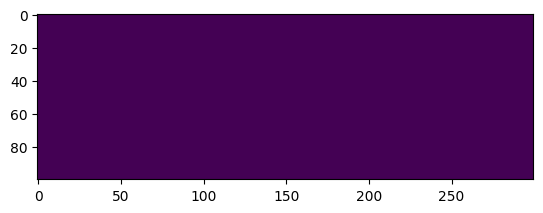

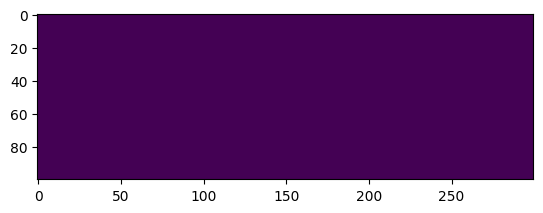

In [4]:
randperm = torch.randperm(labels.shape[0])
outputs = labels[randperm, :, :]

for c in range(outputs.shape[0]):
    plt.imshow(outputs[c], interpolation='nearest')
    plt.show()

In [5]:
similarities = torch.zeros((outputs.shape[0], labels.shape[0]))

for c1 in range(labels.shape[0]):
    for c2 in range(outputs.shape[0]):
        dice = tmF.dice(labels[c1], outputs[c2])
        similarities[c1, c2] = dice
        
indexes = []
for s in range(similarities.shape[0]):
    is_match = False
    similarity = similarities[s]
    
    while not is_match:
        argmax = similarity.argmax().item()
        is_match = similarities[:, argmax].max() == similarity.max()
        
        if is_match and argmax not in indexes:
            indexes.append(argmax)
        else:
            similarity[argmax] = -1
            is_match = False
    
print(indexes)

[0, 9, 1, 2, 3, 4, 5, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 12, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 73, 39, 40, 41, 42, 43, 44, 45, 46, 86, 47, 48, 49, 50, 51, 52, 25, 53, 54, 55, 56, 57, 95, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 7, 84, 82, 83, 85, 87, 88, 89, 90, 6, 91, 92, 94, 58, 93, 96, 97, 98, 99]


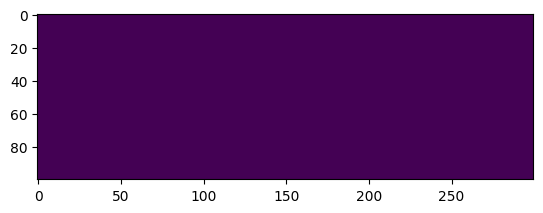

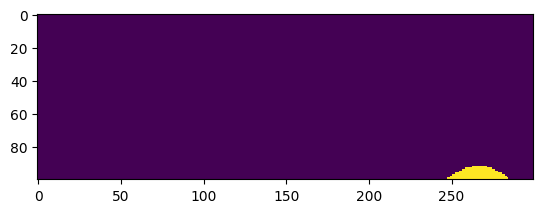

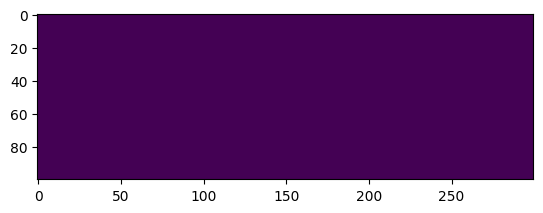

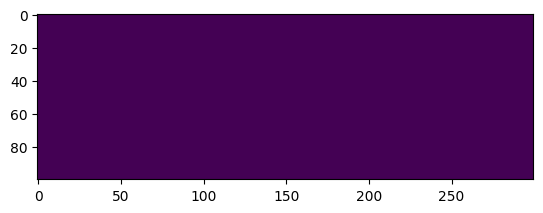

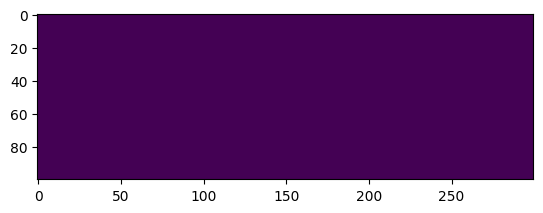

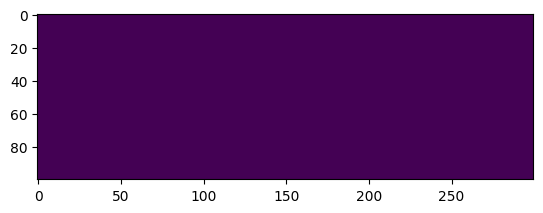

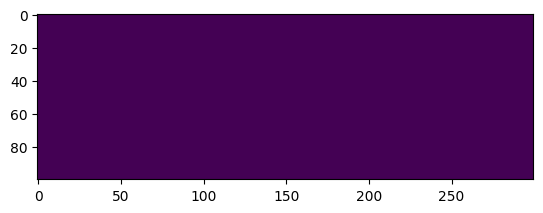

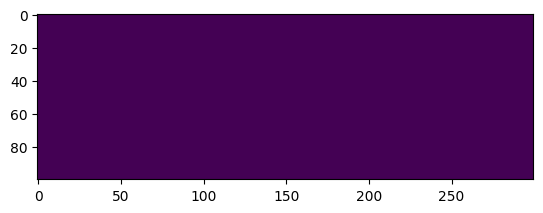

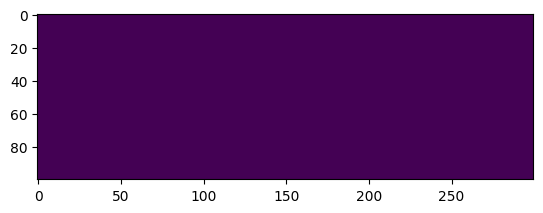

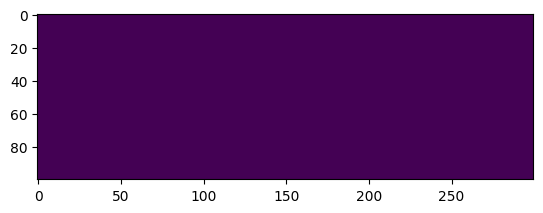

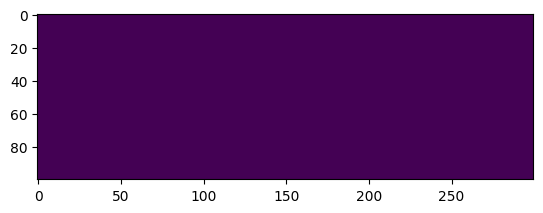

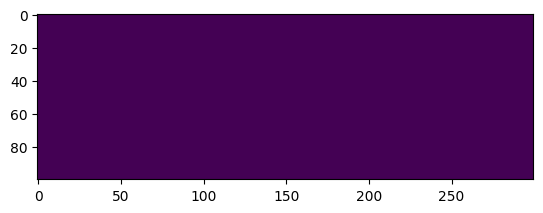

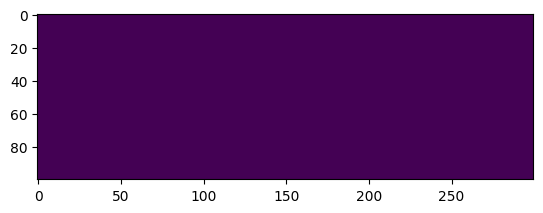

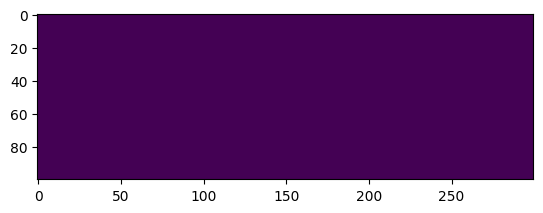

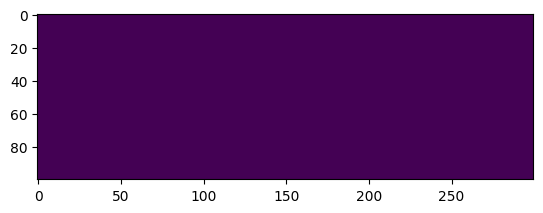

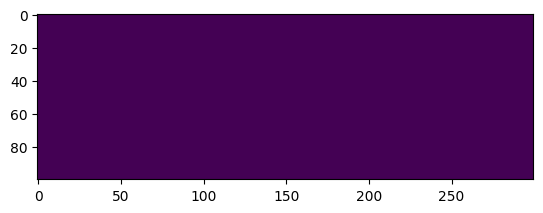

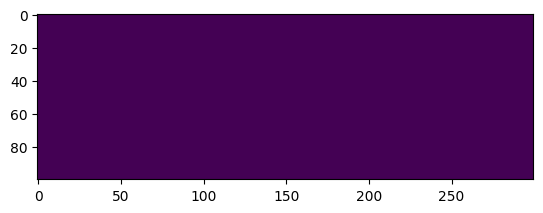

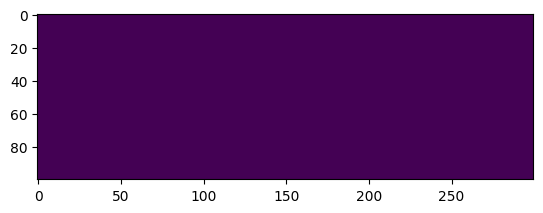

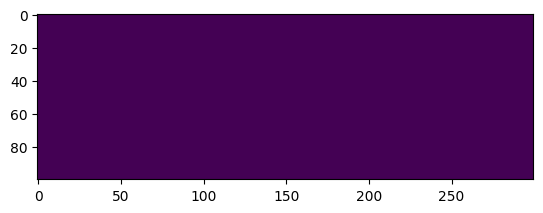

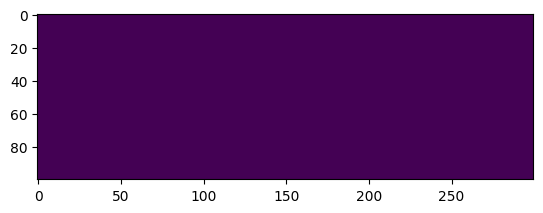

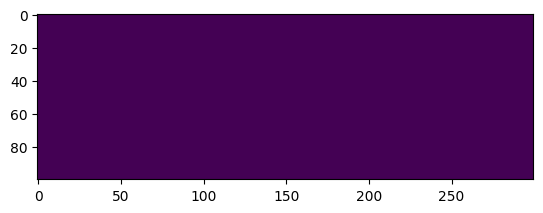

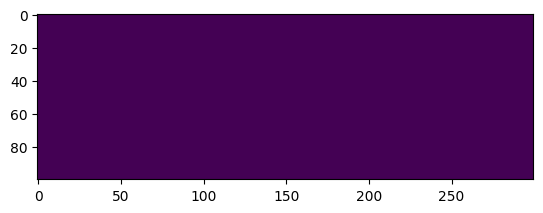

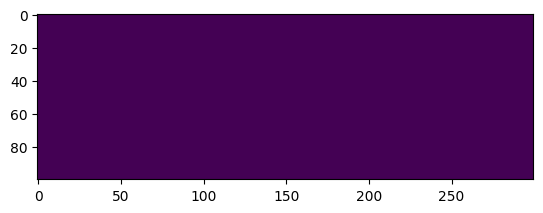

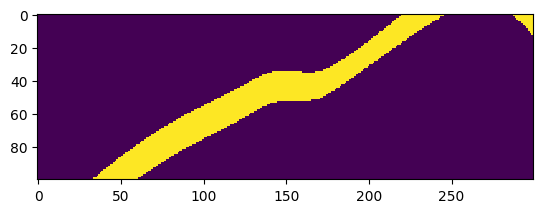

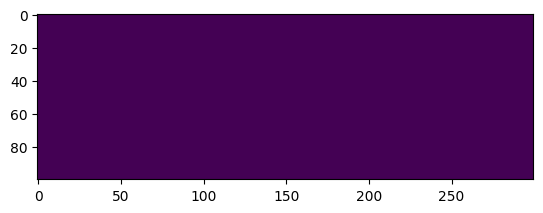

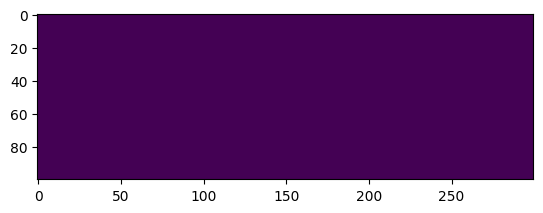

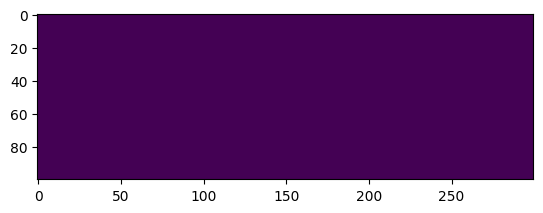

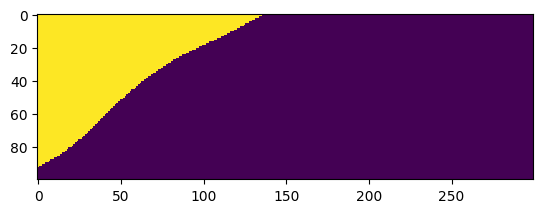

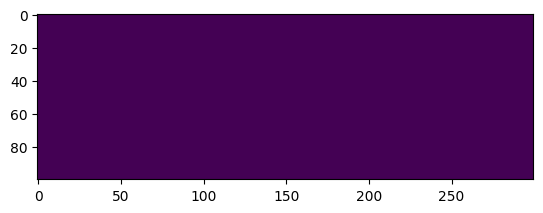

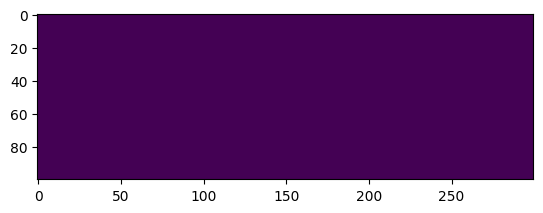

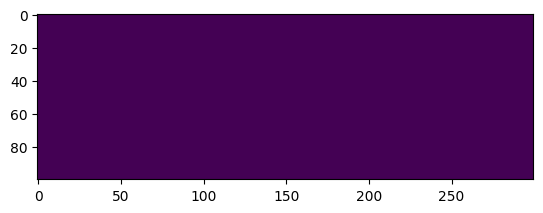

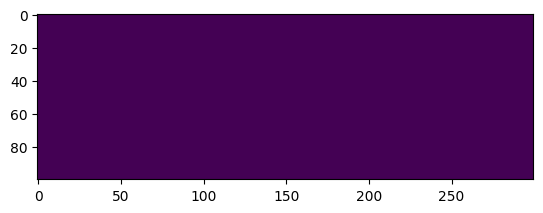

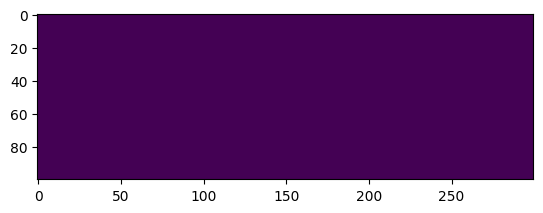

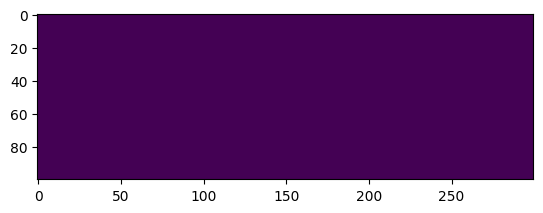

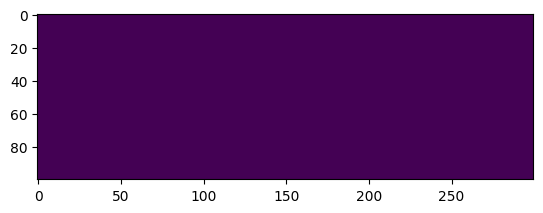

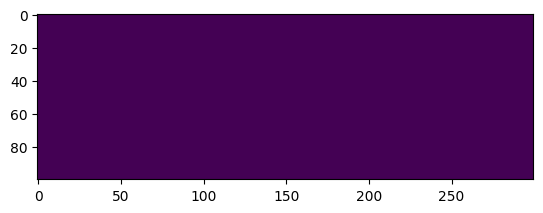

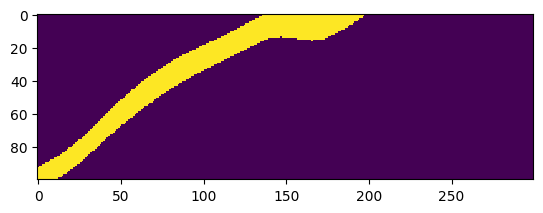

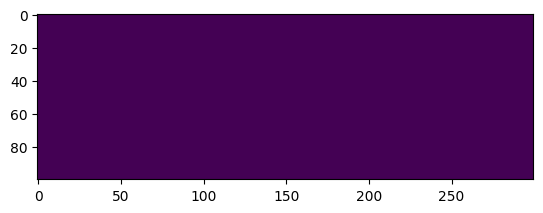

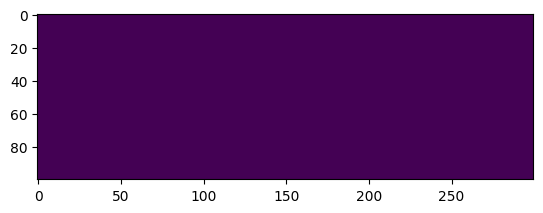

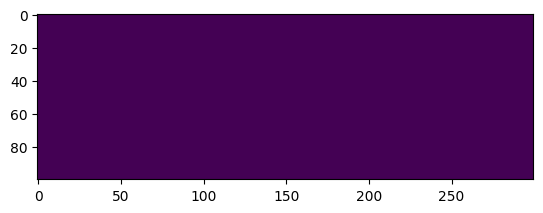

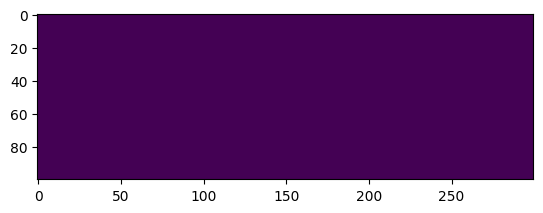

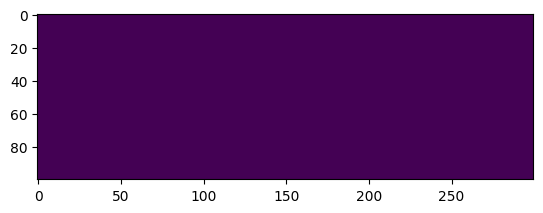

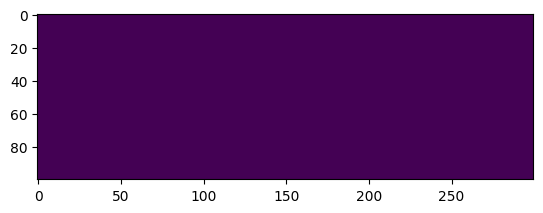

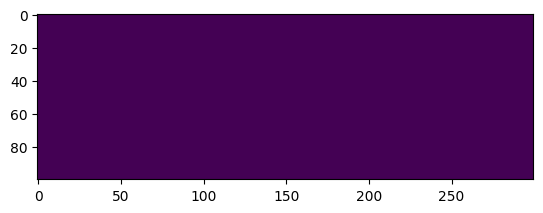

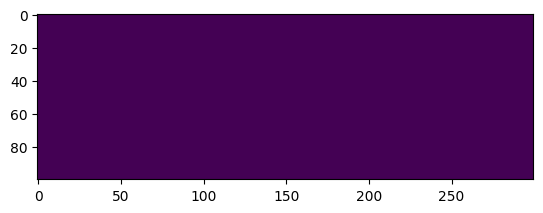

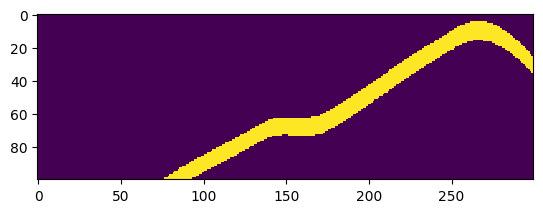

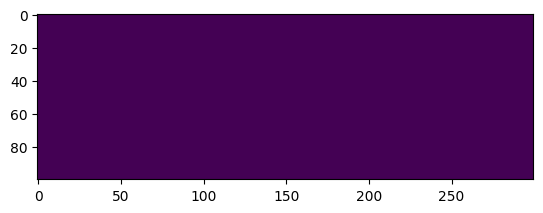

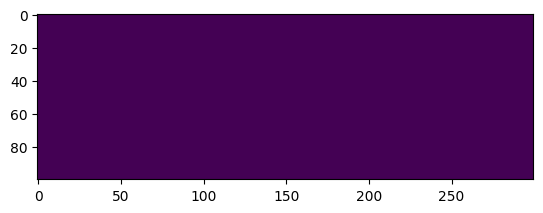

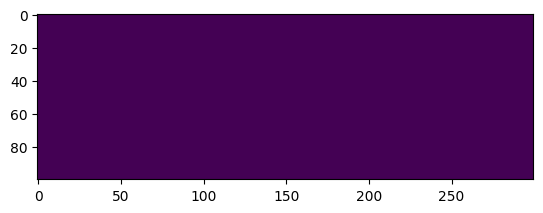

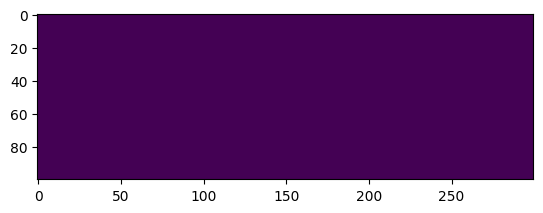

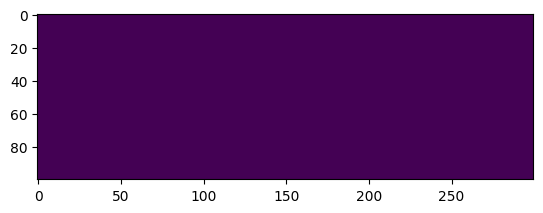

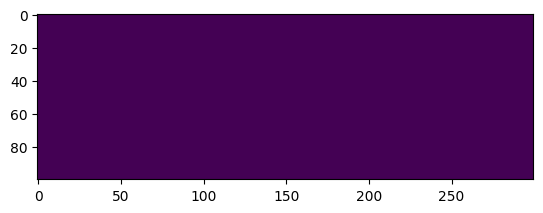

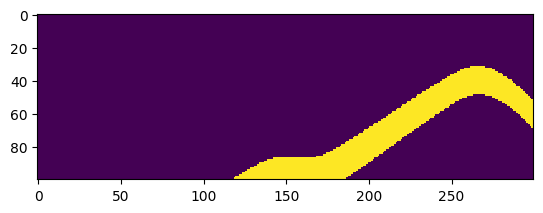

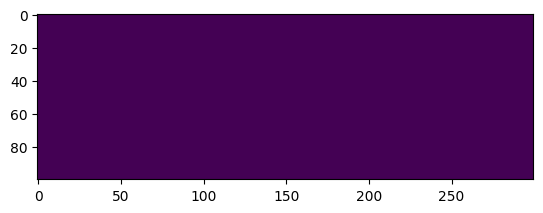

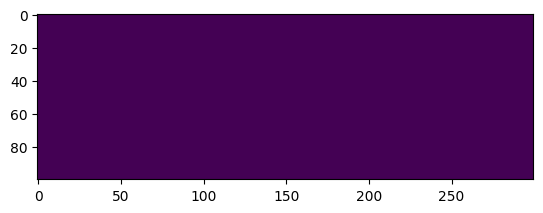

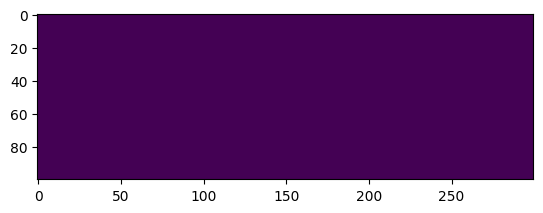

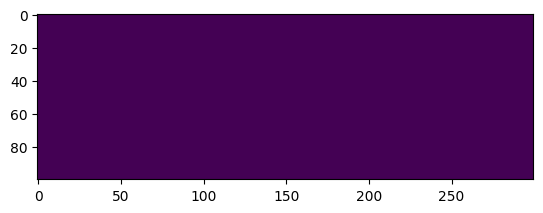

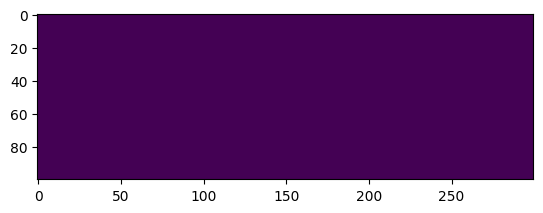

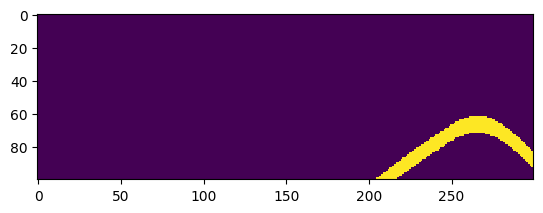

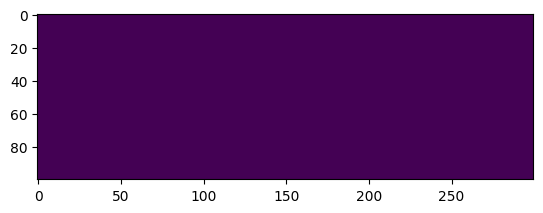

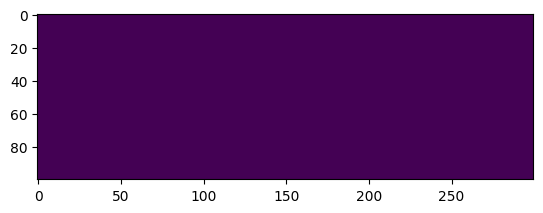

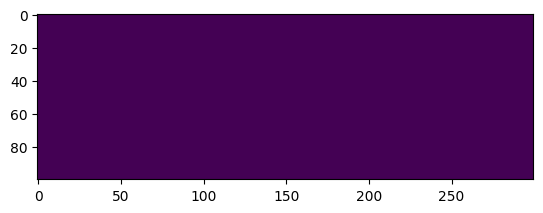

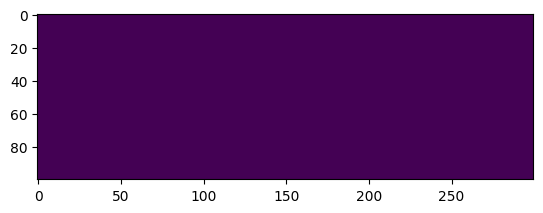

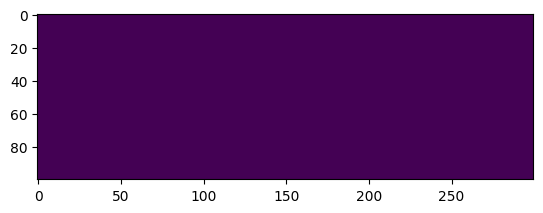

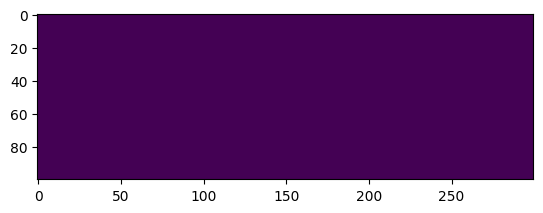

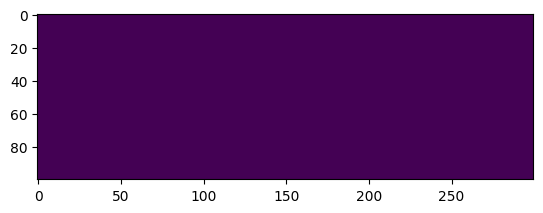

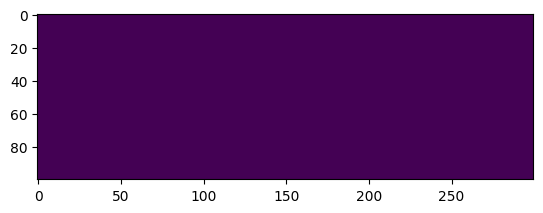

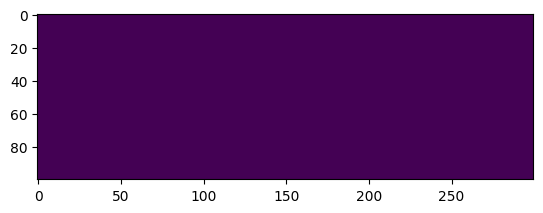

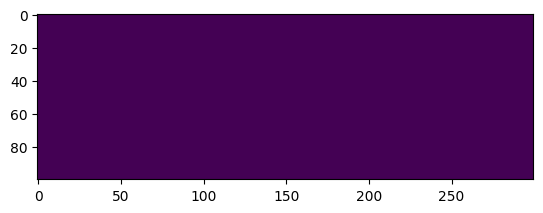

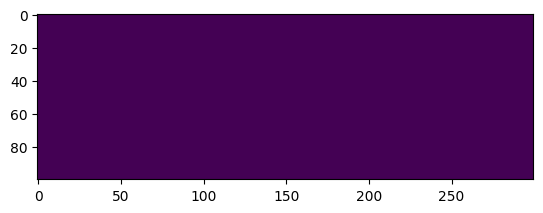

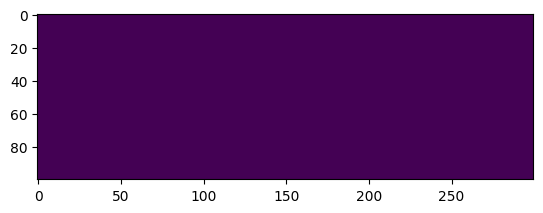

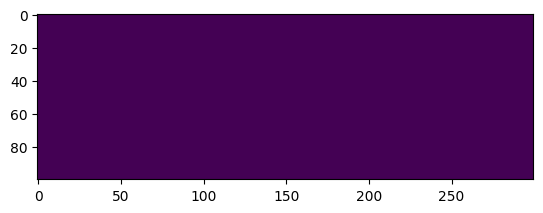

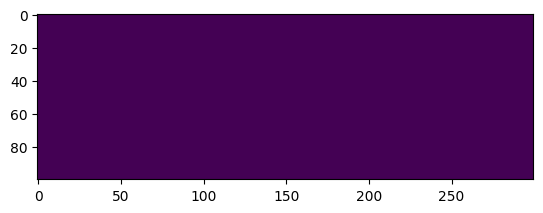

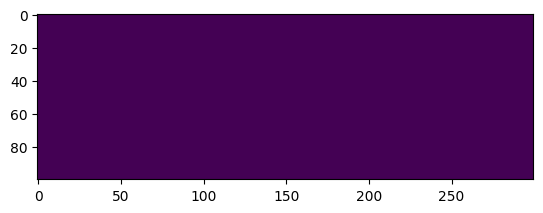

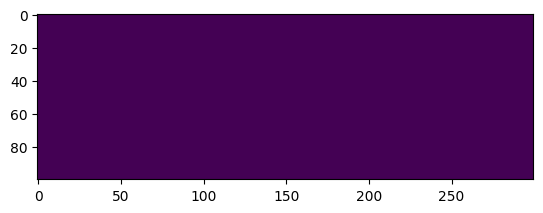

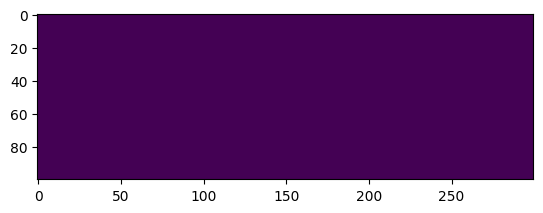

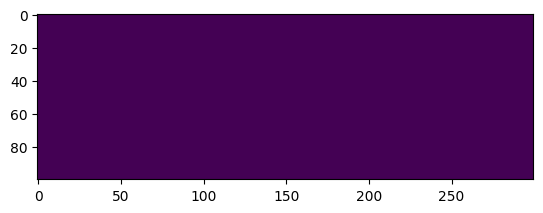

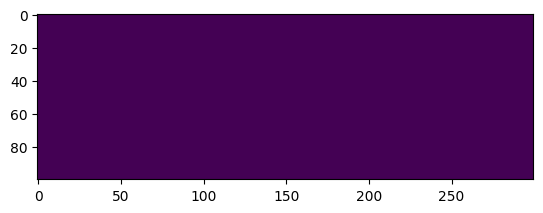

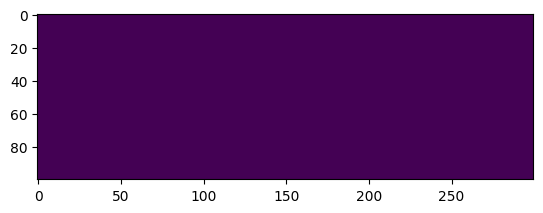

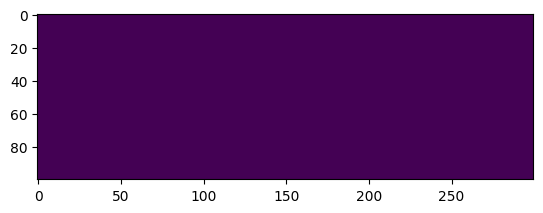

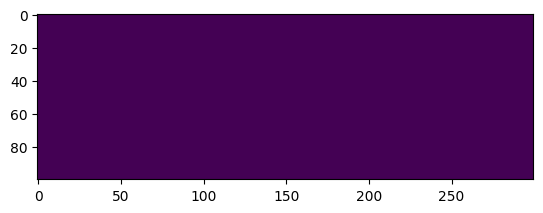

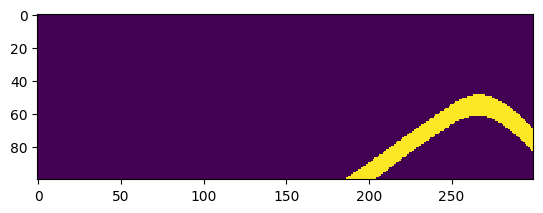

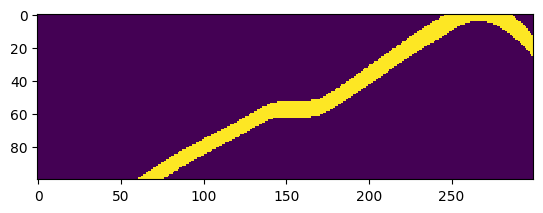

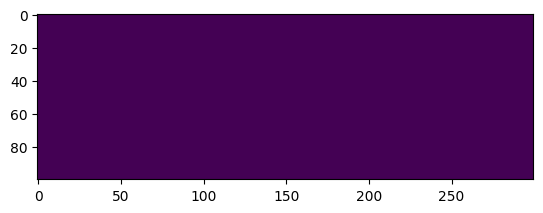

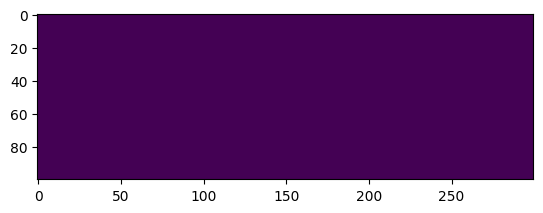

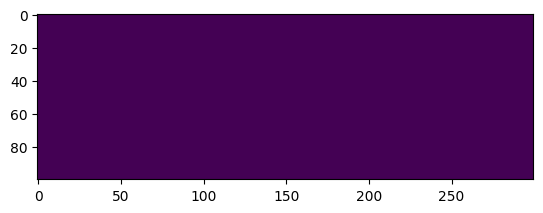

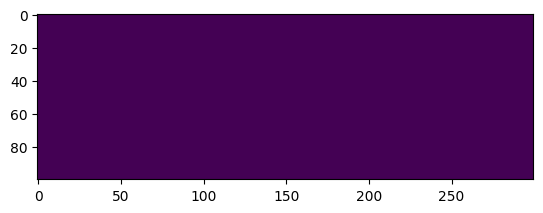

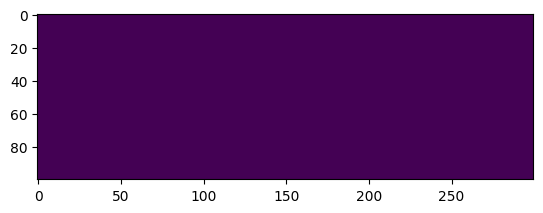

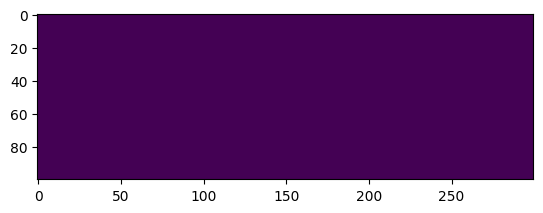

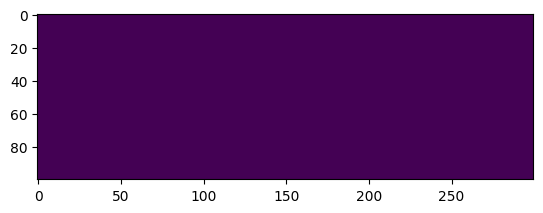

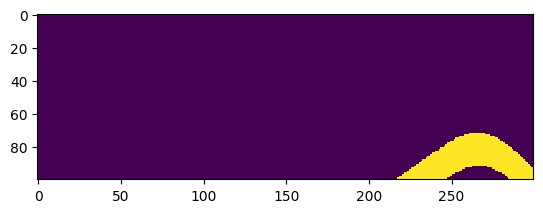

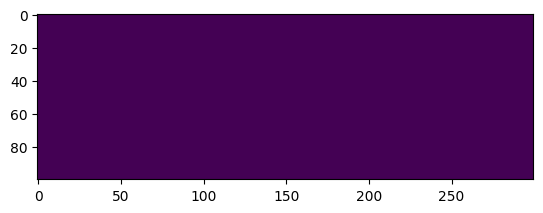

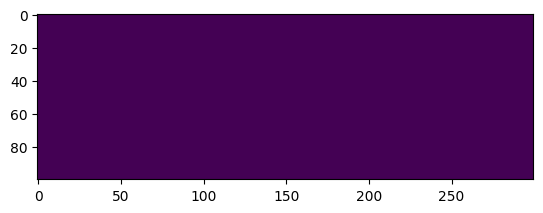

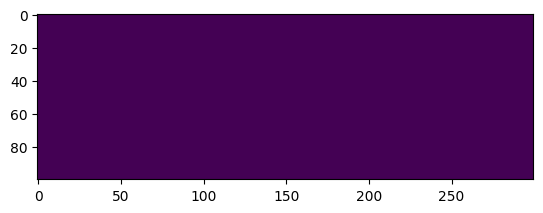

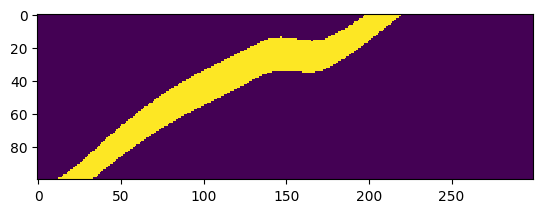

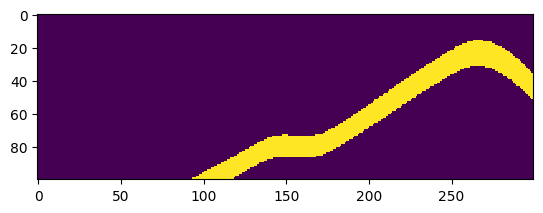

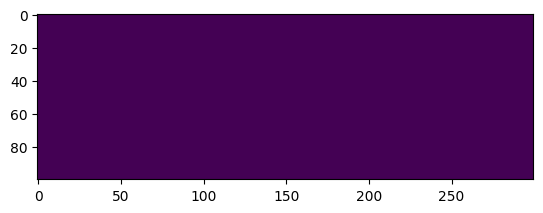

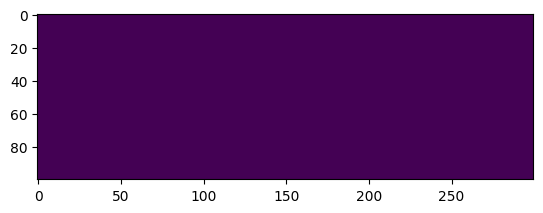

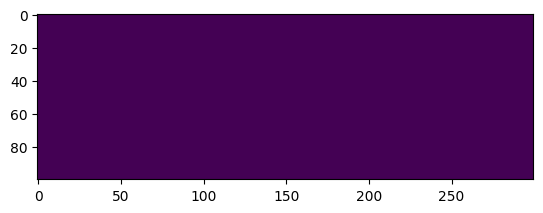

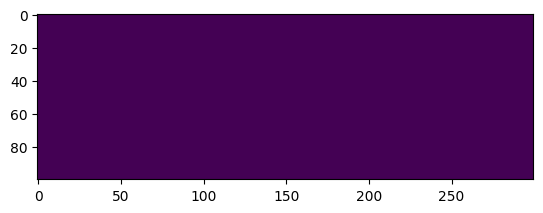

In [6]:
outputs_reordered = outputs[indexes, :, :]

for c in range(outputs_reordered.shape[0]):
    plt.imshow(outputs_reordered[c], interpolation='nearest')
    plt.show()

BEFORE:


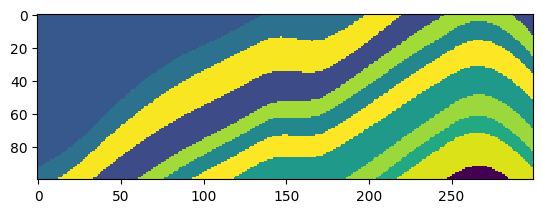

AFTER:


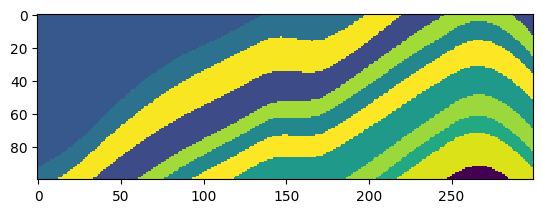

In [7]:
print('BEFORE:')
plt.imshow(labels.argmax(dim=0), interpolation='nearest')
plt.show()

print('AFTER:')
plt.imshow(outputs_reordered.argmax(dim=0), interpolation='nearest')
plt.show()